# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [29]:
# Load in the general demographics data.
azdias =pd.read_csv("Udacity_AZDIAS_Subset.csv",delimiter=';')

# Load in the feature summary file.
feat_info=pd.read_csv("AZDIAS_Feature_Summary.csv",delimiter=';') 

In [49]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head(n=5)
print(azdias.shape)
display(azdias.head(n=10))

(891221, 85)


AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   
5         3                     1          2            2.0   
6        -1                     2          2            5.0   
7        -1                     1          1            3.0   
8        -1                     3          1            3.0   
9        -1                     3          2            4.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   
5                  3              1                 5               2   
6                  1              5                 1               5   
7                  3              3                 4               1   
8                  4              4                 2               4   
9                  2              4                 2               3   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   
5                      2                 5    ...            2.0         3.0   
6                      4                 3    ...            3.0         3.0   
7                      3                 2    ...            3.0         3.0   
8                      2                 2    ...            2.0         3.0   
9                      5                 4    ...            2.0         3.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   
5         1.0         1.0          1.0       5.0       5.0     2.0   
6         1.0         0.0          1.0       5.0       5.0     4.0   
7         1.0         0.0          1.0       4.0       4.0     2.0   
8         2.0         1.0          1.0       3.0       3.0     2.0   
9         2.0         1.0          1.0       3.0       3.0     2.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  
5          3.0       3.0  
6          6.0       3.0  
7          5.0       2.0  
8          4.0       3.0  
9          3.0       1.0  

[10 rows x 85 columns]

In [50]:
print(feat_info.shape)
display(feat_info.head(n=-20))
feat_info.describe()

(85, 4)


attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
..                    ...               ...          ...                ...
35             SEMIO_KAEM            person      ordinal             [-1,9]
36          SEMIO_PFLICHT            person      ordinal             [-1,9]
37            SEMIO_TRADV            person      ordinal             [-1,9]
38            SHOPPER_TYP            person  categorical               [-1]
39                SOHO_KZ            person  categorical               [-1]
40               TITEL_KZ            person  categorical             [-1,0]
41               VERS_TYP            person  categorical               [-1]
42               ZABEOTYP            person  categorical             [-1,9]
43               ALTER_HH         household     interval                [0]
44           ANZ_PERSONEN         household      numeric                 []
45              ANZ_TITEL         household      numeric                 []
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]
47           KK_KUNDENTYP         household  categorical               [-1]
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]
49         WOHNDAUER_2008         household      ordinal             [-1,0]
50    ANZ_HAUSHALTE_AKTIV          building      numeric                [0]
51           ANZ_HH_TITEL          building      numeric                 []
52            GEBAEUDETYP          building  categorical             [-1,0]
53            KONSUMNAEHE          building      ordinal                 []
54       MIN_GEBAEUDEJAHR          building      numeric                [0]
55            OST_WEST_KZ          building  categorical        

attribute information_level     type missing_or_unknown
count            85                85       85                 85
unique           85                 9        5                  9
top     KONSUMNAEHE            person  ordinal               [-1]
freq              1                43       49                 26

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

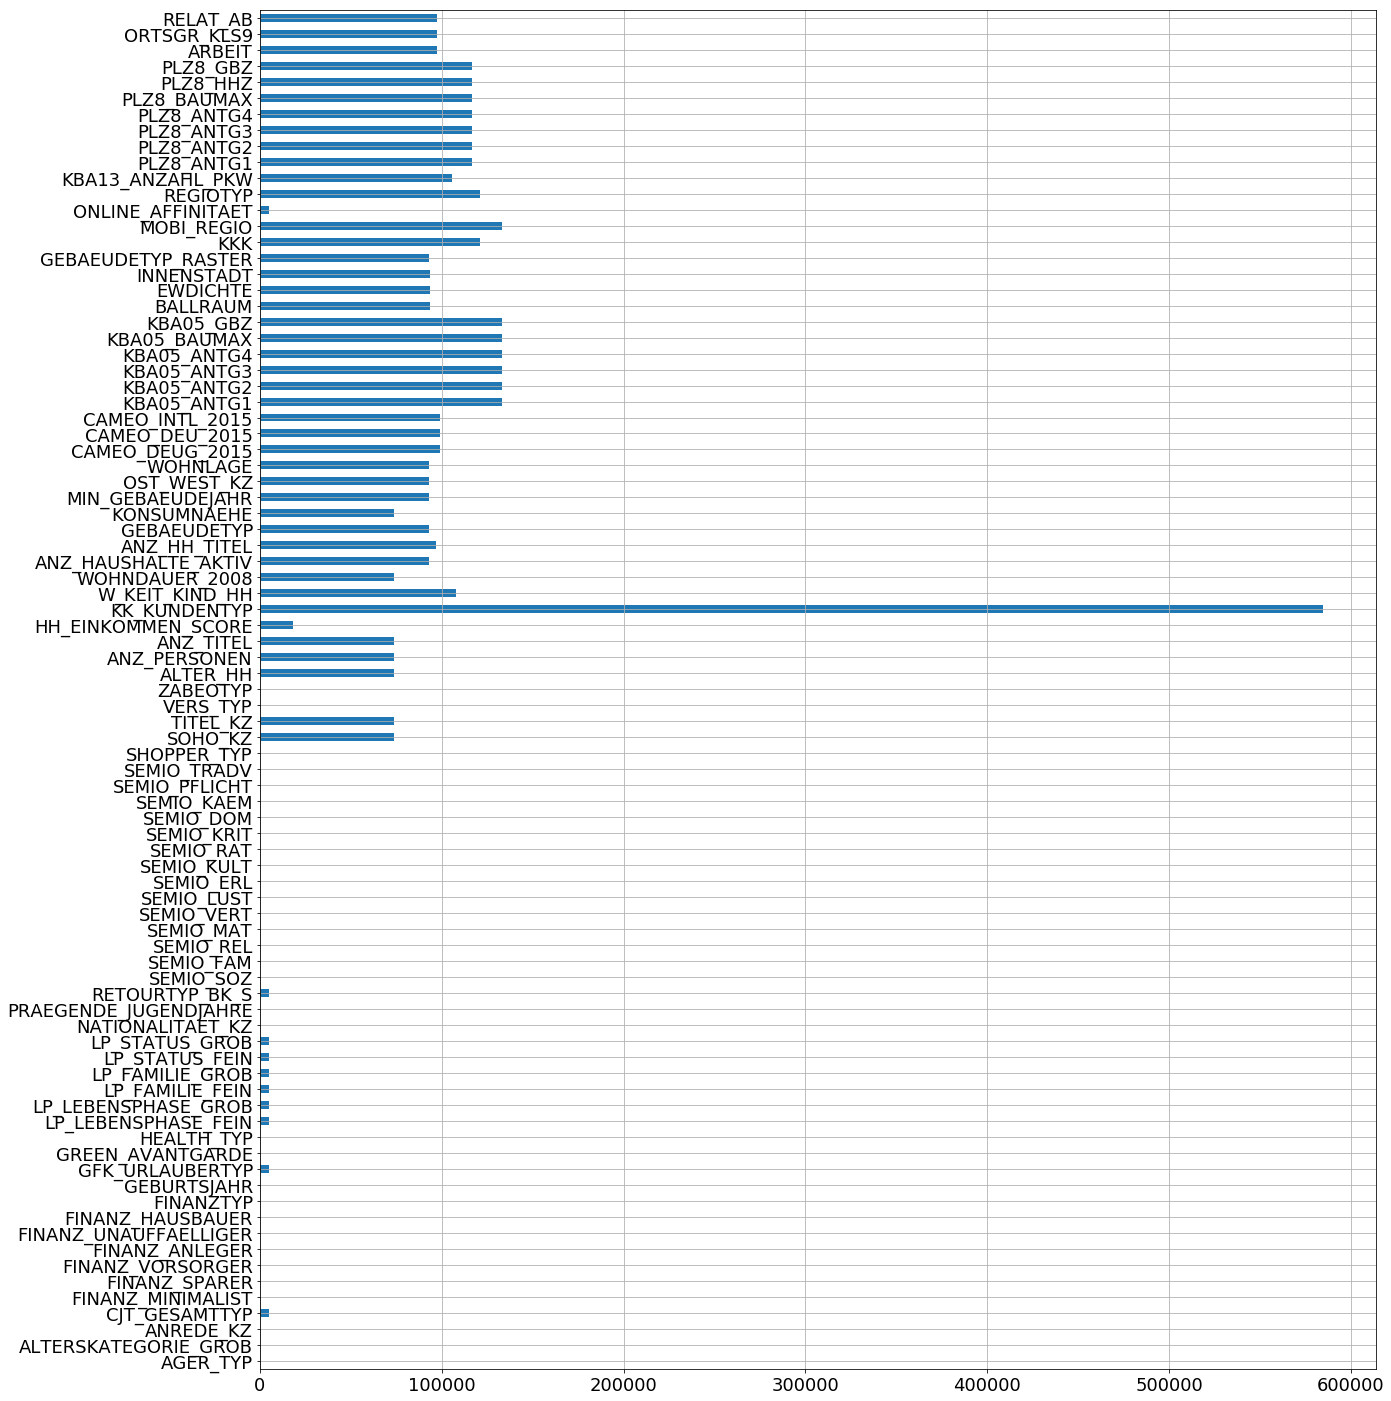

In [51]:
# Identify missing or unknown data values and convert them to NaNs.
missing = (azdias.isnull().sum())
##print(missing)
missing.plot.barh(figsize=(20,25),fontsize=18,grid=True)

In [52]:
azdias_new=azdias.copy()
for i,col in enumerate(azdias_new.iteritems()):
        miss_val=feat_info['missing_or_unknown'][i]
        col_name=col[0]
        miss_val=miss_val[1:-1].split(',')
        if miss_val != ['']:
            new_dat= []
            for p in miss_val:
                if p in ['X','XX']:
                    new_dat.append(p)
                else:
                    new_dat.append(int(p))
            azdias_new[col_name]=azdias_new[col_name].replace(new_dat,np.nan)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0            NaN                   2.0          1            2.0   
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
11           NaN                   2.0          1            6.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
14           NaN                   3.0          1            6.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
17           NaN                   2.0          1            6.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
20           NaN                   2.0          2            4.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
24           NaN                   3.0          2            6.0   
25           NaN                   1.0          1            3.0   
26           NaN                   3.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
...          ...                   ...        ...            ...   
891191       1.0                   4.0          2            1.0   
891192       NaN                   1.0          2            3.0   
891193       2.0                   4.0          1            3.0   
891194       NaN                   3.0          1            4.0   
891195       2.0                   4.0          2            6.0   
891196       NaN                   2.0          2            6.0   
891197       NaN                   3.0          2            1.0   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891203       NaN                   4.0          2            1.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0

In [53]:
azdias_new

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0            NaN                   2.0          1            2.0   
1            NaN                   1.0          2            5.0   
2            NaN                   3.0          2            3.0   
3            2.0                   4.0          2            2.0   
4            NaN                   3.0          1            5.0   
5            3.0                   1.0          2            2.0   
6            NaN                   2.0          2            5.0   
7            NaN                   1.0          1            3.0   
8            NaN                   3.0          1            3.0   
9            NaN                   3.0          2            4.0   
10           NaN                   3.0          2            1.0   
11           NaN                   2.0          1            6.0   
12           NaN                   3.0          1            6.0   
13           NaN                   1.0          2            5.0   
14           NaN                   3.0          1            6.0   
15           1.0                   4.0          2            4.0   
16           NaN                   1.0          2            1.0   
17           NaN                   2.0          1            6.0   
18           NaN                   2.0          2            6.0   
19           NaN                   3.0          1            3.0   
20           NaN                   2.0          2            4.0   
21           NaN                   2.0          1            3.0   
22           NaN                   1.0          1            4.0   
23           NaN                   3.0          1            3.0   
24           NaN                   3.0          2            6.0   
25           NaN                   1.0          1            3.0   
26           NaN                   3.0          1            3.0   
27           NaN                   3.0          1            4.0   
28           NaN                   3.0          1            2.0   
29           2.0                   4.0          2            1.0   
...          ...                   ...        ...            ...   
891191       1.0                   4.0          2            1.0   
891192       NaN                   1.0          2            3.0   
891193       2.0                   4.0          1            3.0   
891194       NaN                   3.0          1            4.0   
891195       2.0                   4.0          2            6.0   
891196       NaN                   2.0          2            6.0   
891197       NaN                   3.0          2            1.0   
891198       NaN                   3.0          1            5.0   
891199       NaN                   2.0          1            3.0   
891200       NaN                   1.0          2            3.0   
891201       NaN                   3.0          1            3.0   
891202       NaN                   2.0          2            5.0   
891203       NaN                   4.0          2            1.0   
891204       NaN                   3.0          1            5.0   
891205       1.0                   4.0          1            2.0   
891206       NaN                   1.0          2            4.0   
891207       1.0                   3.0          2            1.0   
891208       NaN                   4.0          1            2.0   
891209       NaN                   1.0          2            5.0   
891210       NaN                   3.0          1            5.0   
891211       NaN                   3.0          1            2.0   
891212       NaN                   4.0          1            1.0   
891213       NaN                   4.0          2            5.0   
891214       NaN                   1.0          2            4.0   
891215       NaN                   2.0          2            6.0   
891216       NaN                   3.0          2            5.0   
891217       NaN                   2.0          1            4.0

In [54]:
missing = azdias_new.isnull().sum()    

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

TITEL_KZ        99.757636
AGER_TYP        76.955435
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
GEBURTSJAHR     44.020282
ALTER_HH        34.813699
REGIOTYP        17.735668
KKK             17.735668
dtype: float64

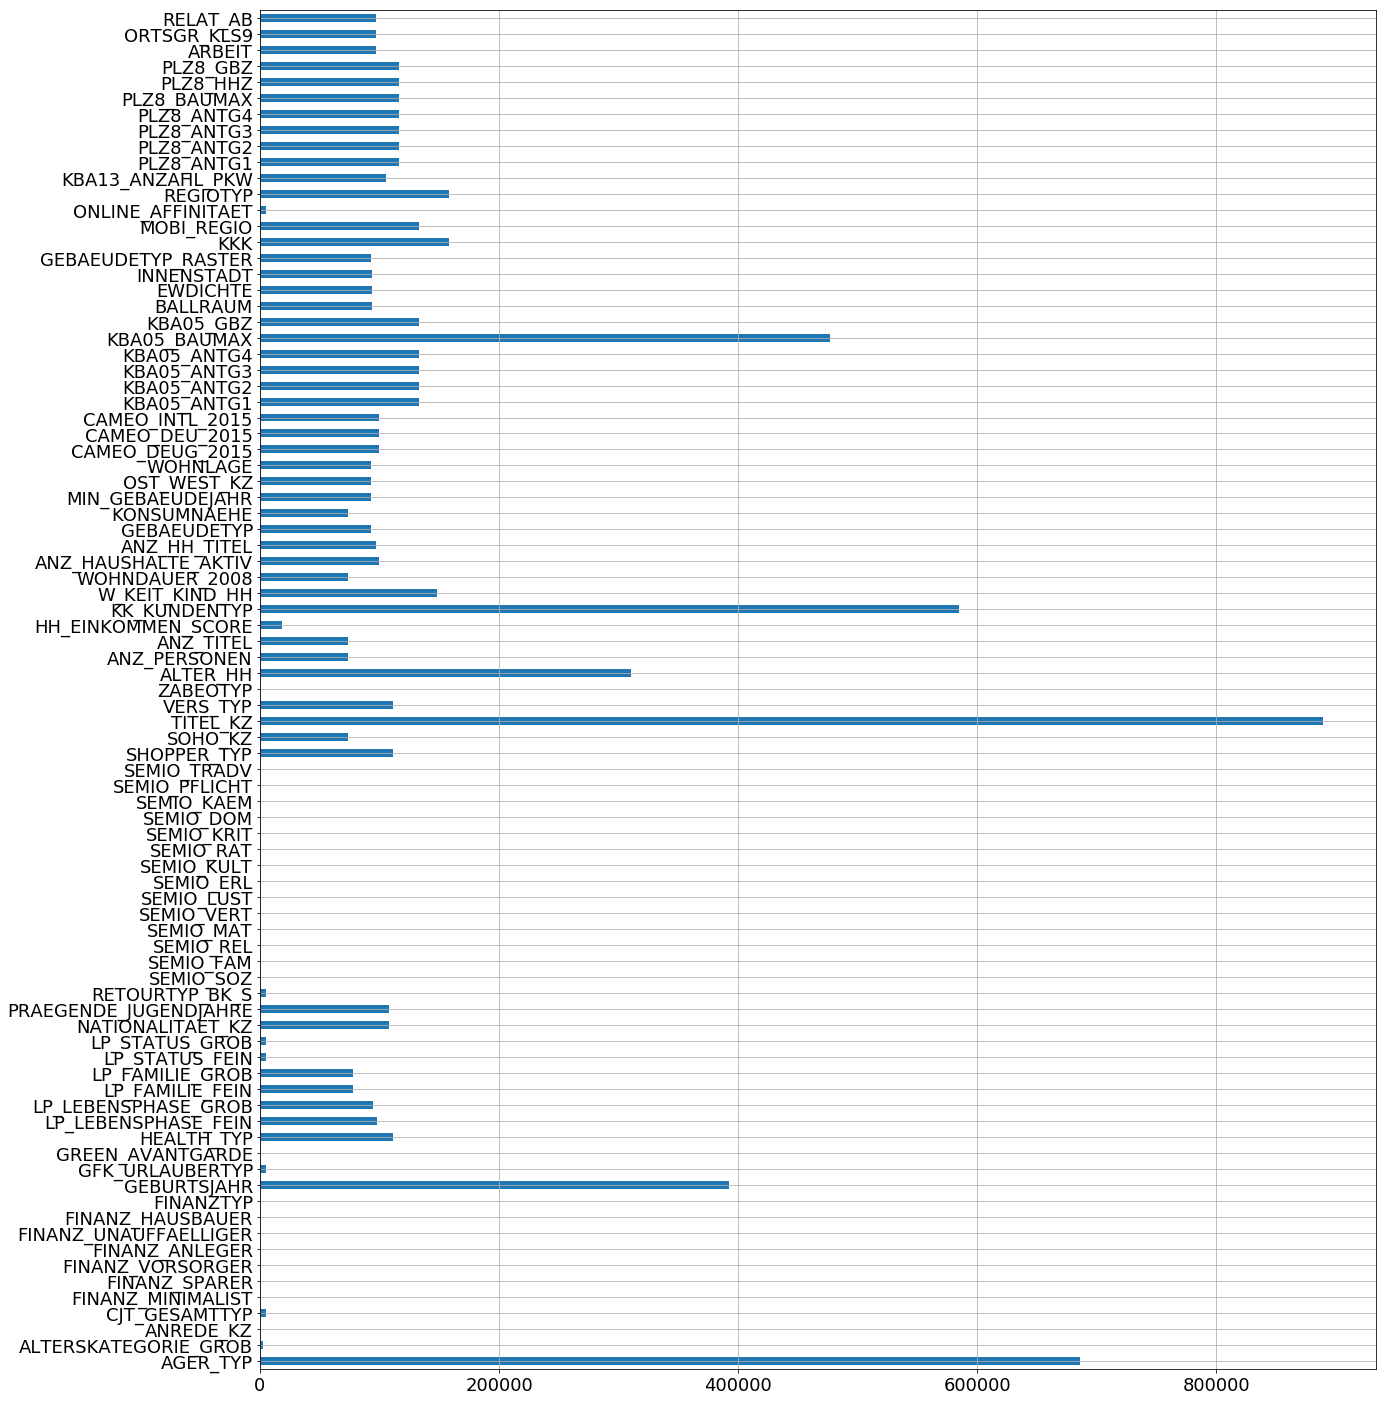

In [56]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

#plt.hist(missing)

chk=missing/len(azdias_new)*100
missing.plot.barh(figsize=(20,25),fontsize=18,grid=True)
chk[chk>17].sort_values(ascending=False)

In [57]:
#missing = (azdias.isnull().sum())
missing['TITEL_KZ']
round(azdias_new.isnull().sum().sum())
azdias_new['TITEL_KZ'].value_counts()
print(len(missing))
(missing).sort_values(ascending=True)

85


ZABEOTYP                      0
SEMIO_TRADV                   0
SEMIO_PFLICHT                 0
SEMIO_KAEM                    0
SEMIO_DOM                     0
SEMIO_KRIT                    0
SEMIO_RAT                     0
SEMIO_KULT                    0
SEMIO_ERL                     0
SEMIO_LUST                    0
SEMIO_VERT                    0
SEMIO_MAT                     0
SEMIO_REL                     0
SEMIO_SOZ                     0
SEMIO_FAM                     0
FINANZ_VORSORGER              0
ANREDE_KZ                     0
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
GREEN_AVANTGARDE              0
FINANZTYP                     0
ALTERSKATEGORIE_GROB       2881
GFK_URLAUBERTYP            4854
LP_STATUS_GROB             4854
LP_STATUS_FEIN             4854
ONLINE_AFFINITAET          4854
RETOURTYP_BK_S             4854
                          ...  
CAMEO_IN

In [58]:
round(azdias_new.isnull().sum()/azdias_new.shape[0]*100).sort_values(ascending=True)

ZABEOTYP                   0.0
SEMIO_TRADV                0.0
SEMIO_PFLICHT              0.0
SEMIO_KAEM                 0.0
SEMIO_DOM                  0.0
SEMIO_KRIT                 0.0
SEMIO_RAT                  0.0
SEMIO_KULT                 0.0
SEMIO_ERL                  0.0
SEMIO_LUST                 0.0
SEMIO_VERT                 0.0
SEMIO_MAT                  0.0
SEMIO_REL                  0.0
SEMIO_SOZ                  0.0
SEMIO_FAM                  0.0
FINANZ_VORSORGER           0.0
ALTERSKATEGORIE_GROB       0.0
ANREDE_KZ                  0.0
FINANZ_MINIMALIST          0.0
FINANZ_SPARER              0.0
FINANZ_ANLEGER             0.0
FINANZ_UNAUFFAELLIGER      0.0
FINANZ_HAUSBAUER           0.0
GREEN_AVANTGARDE           0.0
FINANZTYP                  0.0
LP_STATUS_FEIN             1.0
GFK_URLAUBERTYP            1.0
LP_STATUS_GROB             1.0
ONLINE_AFFINITAET          1.0
RETOURTYP_BK_S             1.0
                         ...  
ORTSGR_KLS9               11.0
LP_LEBEN

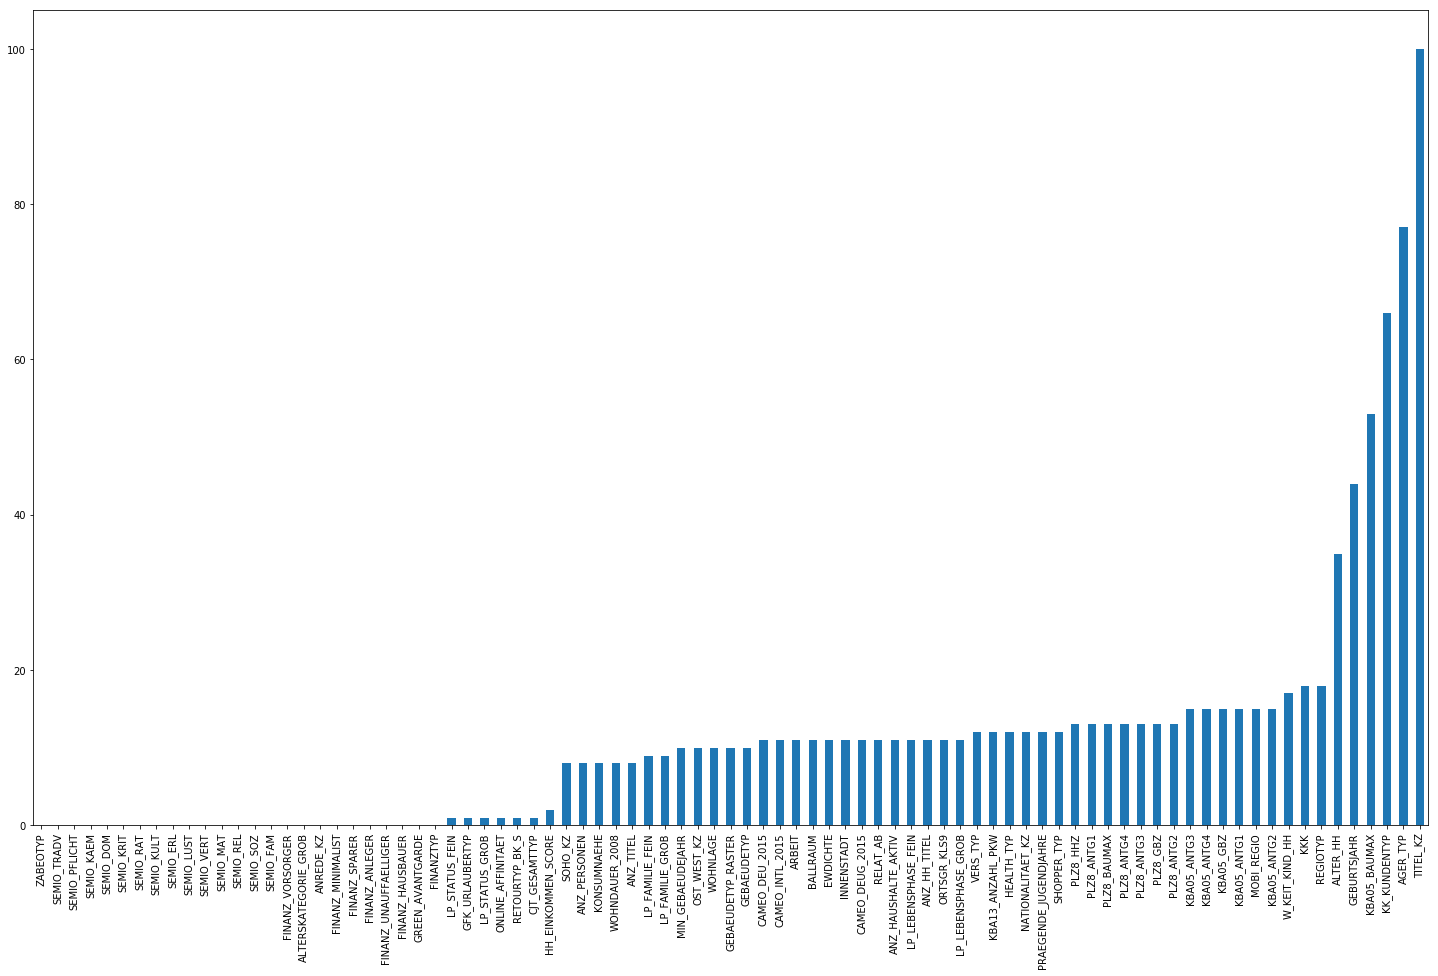

In [59]:
# Investigate patterns in the amount of missing data in each column.

round((azdias_new.isnull().sum()/azdias_new.shape[0]*100)).sort_values(ascending=True).plot.bar(figsize=(25,15))

Text(0.5,1,'KBA05_ANTG4')

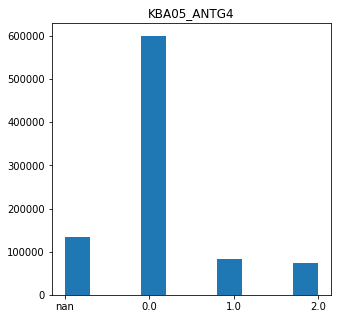

In [60]:
plt.figure(1,figsize=(5,5))
plt.hist(azdias_new[['KBA05_ANTG4']])
plt.title('KBA05_ANTG4')

Text(0.5,1,'KK_KUNDENTYP')

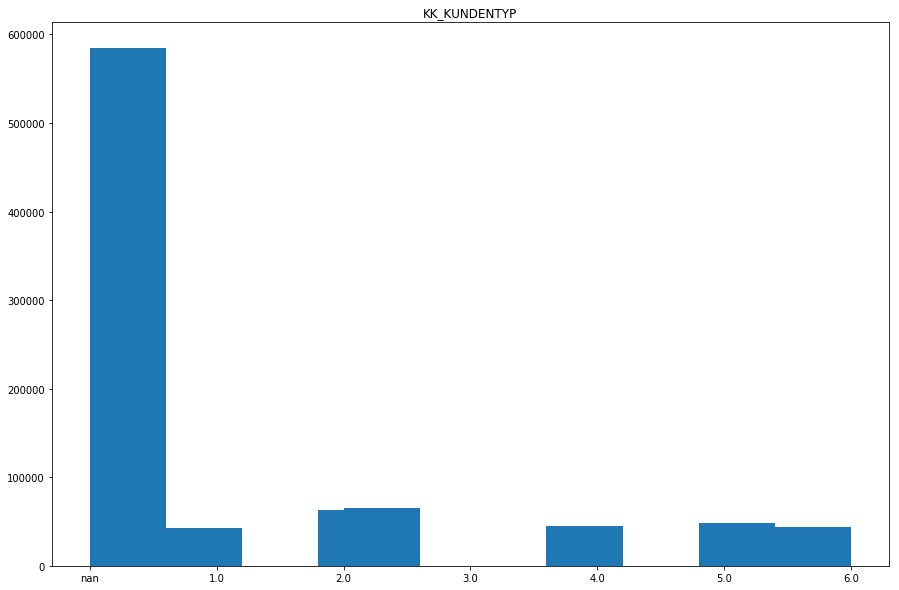

In [61]:
plt.figure(2,figsize=(15,10))
plt.hist(azdias_new[['KK_KUNDENTYP']])
plt.title('KK_KUNDENTYP')

In [62]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
drop_column=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH',
             'REGIOTYP','KKK','W_KEIT_KIND_HH']
azdias_new1=azdias_new.drop(drop_column,axis=1)

azdias_new1.shape





(891221, 76)

In [63]:
feat_info_new=feat_info.copy()
for i in drop_column:
    dro_val=feat_info[feat_info['attribute']==i].index[0]
    feat_info_new.drop(dro_val,axis=0,inplace=True)
feat_info_new.shape
#azdias_new1['KK_KUNDENTYP'].value_counts()

(76, 4)

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)





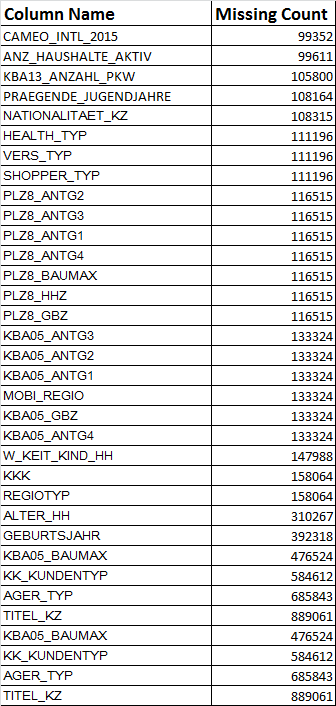

Following are the columns are removed from dataset. It contains high number of missing values. 
['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH',
             'REGIOTYP','KKK','W_KEIT_KIND_HH']
Total 9 columns are droped. These columns have missing values greater than 17%.




#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

(891221,)

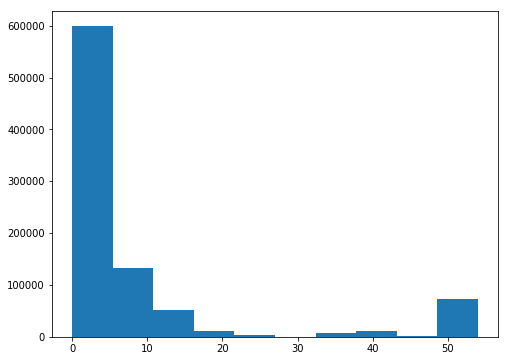

In [65]:
# How much data is missing in each row of the dataset?
row_miss_data=azdias_new.isnull().sum(axis=1)
plt.figure(figsize=(8,6))
plt.hist(row_miss_data)
row_miss_data.shape

In [66]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
row_miss_data.describe()

count    891221.000000
mean          9.396018
std          13.971829
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          54.000000
dtype: float64

In [67]:
check1_to_20=(azdias_new1.isnull().sum(axis=1))<15
check2_from_20=azdias_new1.isnull().sum(axis=1)>=15
check1_to_20.head(5)
azdias_new_to_20=azdias_new1[check1_to_20]
azdias_new_from_20=azdias_new1[check2_from_20]
print(azdias_new_to_20.shape)
print(azdias_new_from_20.shape)

(794298, 76)
(96923, 76)


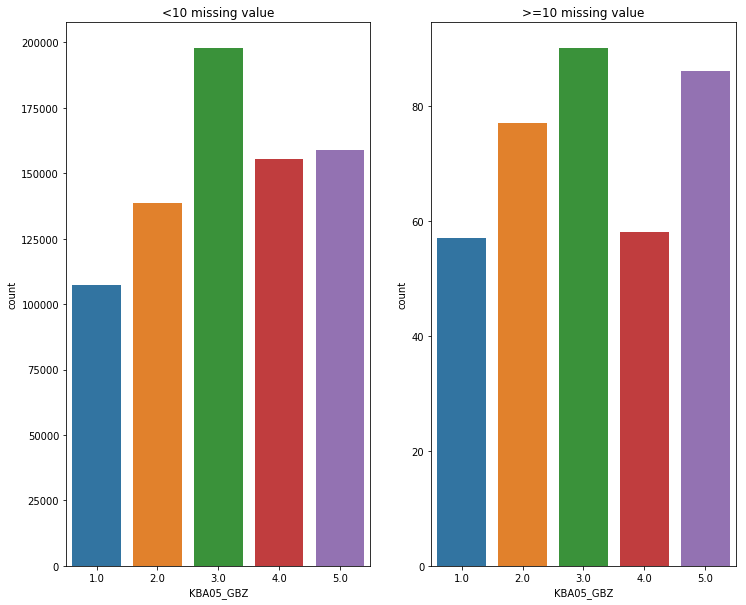

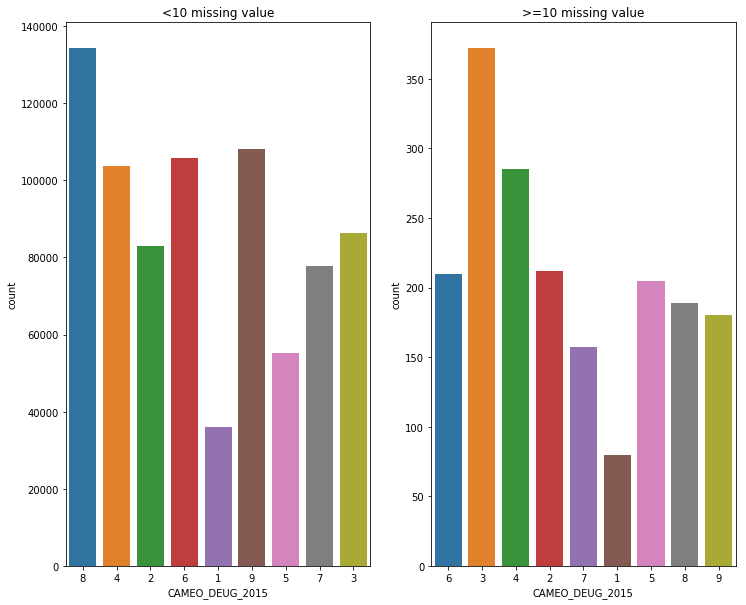

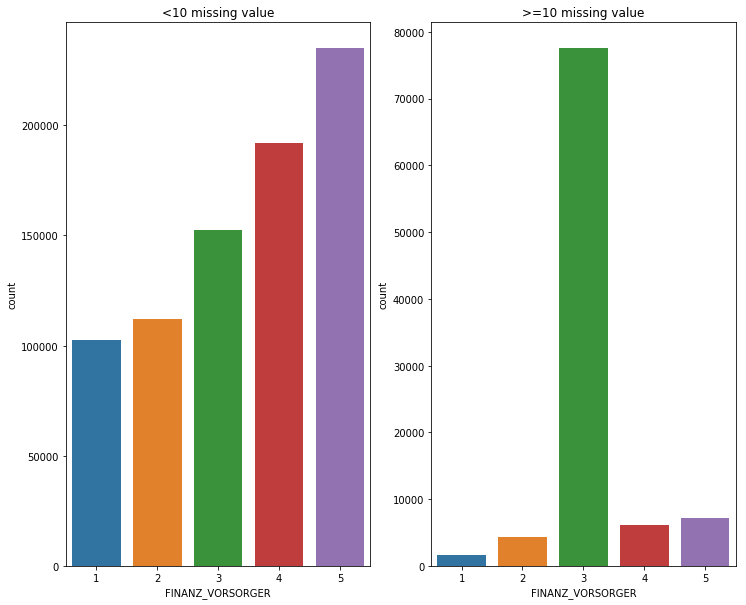

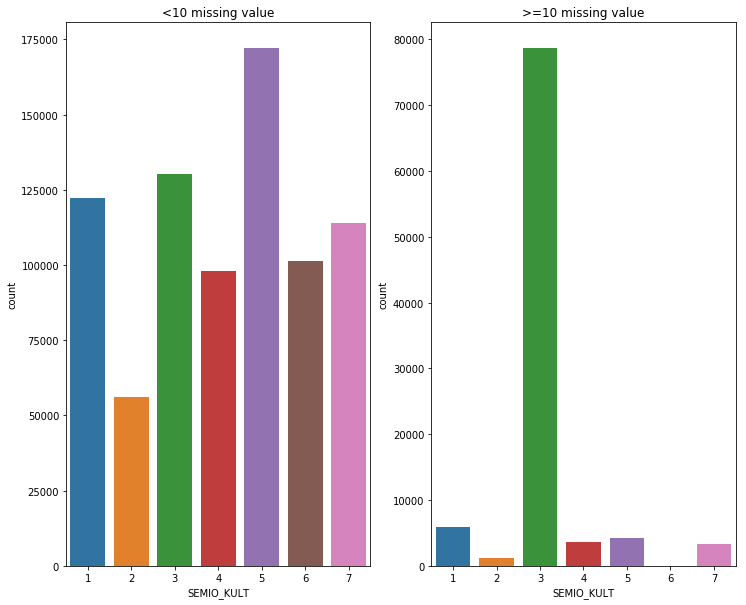

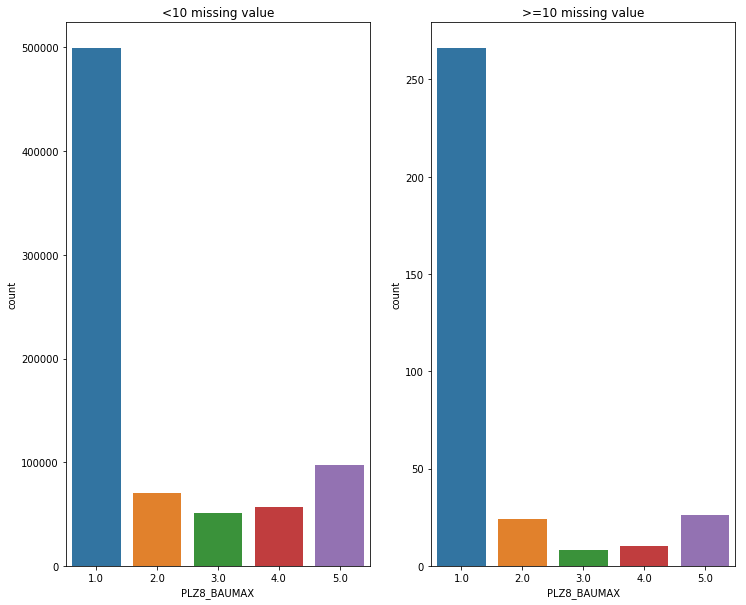

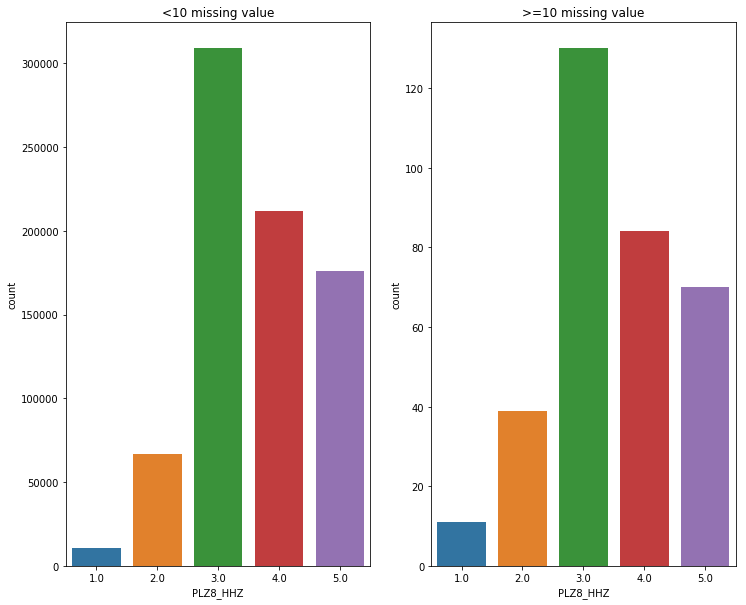

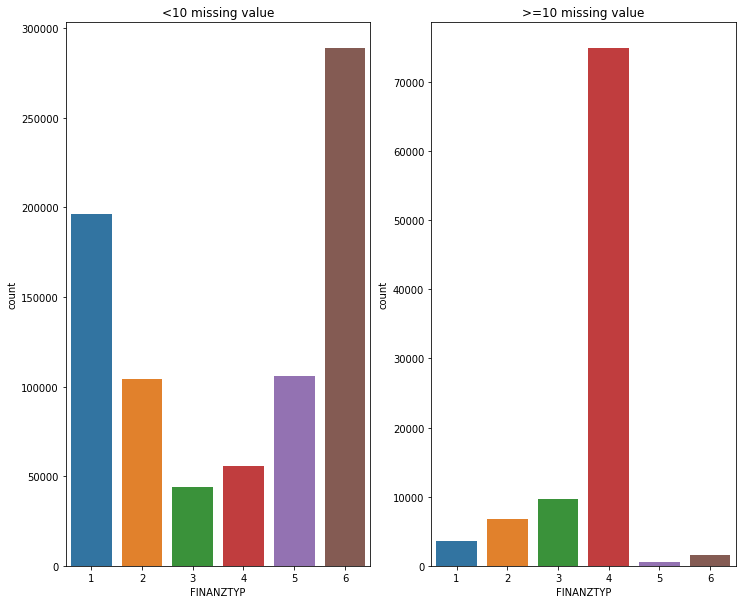

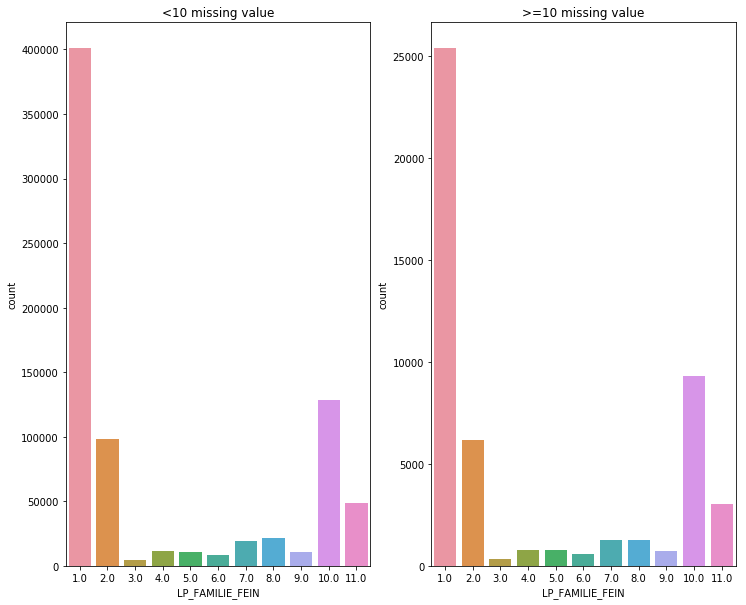

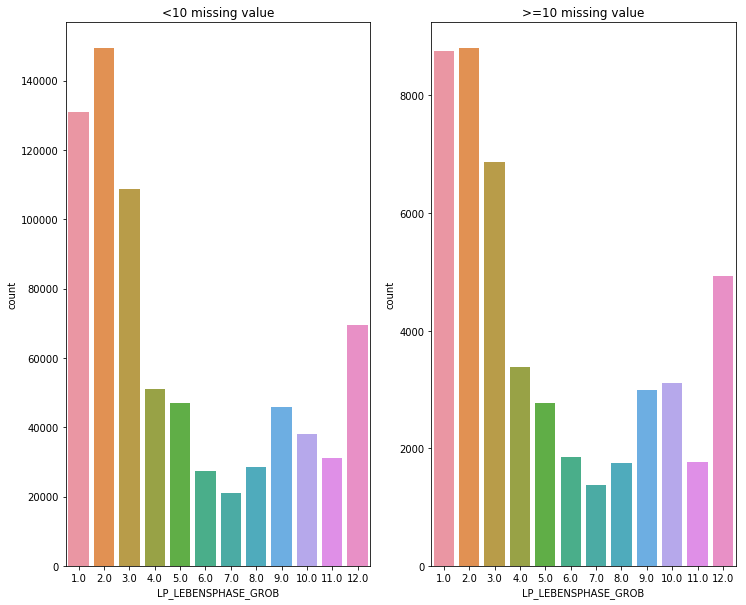

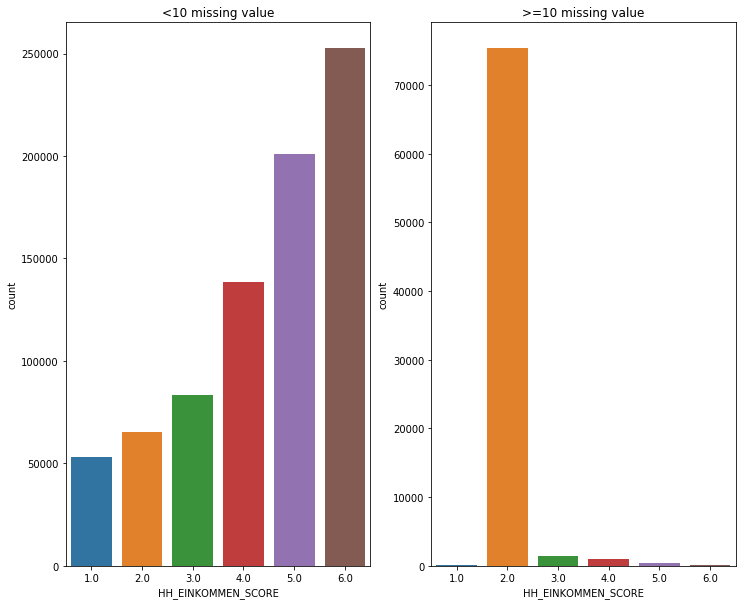

In [68]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
import random
for i in random.sample(range(76),10):
    
    plt.figure(figsize=(12,10))
    plt.subplot(1,2,1)
    sns.countplot(x=azdias_new_to_20.columns[i],data=azdias_new_to_20)
    plt.title("<10 missing value")
    plt.subplot(1,2,2)
    sns.countplot(x=azdias_new_from_20.columns[i],data=azdias_new_from_20)
    plt.title(">=10 missing value")

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

Total 96923 rows have large no of missing values. So they are eliminated from rows.
Two new sets are formed to seperate missing contents. Large no of missing values in rows are completely eliminated from dataset.

By looking the above graph , it seems that some of columns have unequal distribution and some of them are similiar distribution. 
For further prediction of the data , I  will take those rows which have missing value less than 15


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [69]:
# How many features are there of each data type?
print(feat_info['type'].value_counts())
print(feat_info_new['type'].value_counts())

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64
ordinal        46
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [70]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

chk_catg=feat_info_new.loc[feat_info_new['type']=='categorical','attribute'].values
#azdias[chk_catg].head(20)
print(chk_catg)
binary_clm=[]
multi_clm=[]
for i in chk_catg:
    if azdias_new_to_20[i].nunique() > 2:
        multi_clm.append(i)
        #print(azdias_new_to_20[i].value_counts())
    else:
        binary_clm.append(i)
        print(azdias_new_to_20[i].value_counts())


azdias_new_to_20.head(5)    


['ANREDE_KZ' 'CJT_GESAMTTYP' 'FINANZTYP' 'GFK_URLAUBERTYP'
 'GREEN_AVANTGARDE' 'LP_FAMILIE_FEIN' 'LP_FAMILIE_GROB' 'LP_STATUS_FEIN'
 'LP_STATUS_GROB' 'NATIONALITAET_KZ' 'SHOPPER_TYP' 'SOHO_KZ' 'VERS_TYP'
 'ZABEOTYP' 'GEBAEUDETYP' 'OST_WEST_KZ' 'CAMEO_DEUG_2015' 'CAMEO_DEU_2015']
2    414081
1    380217
Name: ANREDE_KZ, dtype: int64
0    619648
1    174650
Name: GREEN_AVANTGARDE, dtype: int64
0.0    787616
1.0      6682
Name: SOHO_KZ, dtype: int64
2.0    393502
1.0    364971
Name: VERS_TYP, dtype: int64
W    626351
O    167947
Name: OST_WEST_KZ, dtype: int64


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
1                   1.0          2            5.0                  1   
2                   3.0          2            3.0                  1   
3                   4.0          2            2.0                  4   
4                   3.0          1            5.0                  4   
5                   1.0          2            2.0                  3   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
1              5                 2               5                      4   
2              4                 1               2                      3   
3              2                 5               2                      1   
4              3                 4               1                      3   
5              1                 5               2                      2   

   FINANZ_HAUSBAUER  FINANZTYP    ...     PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  \
1                 5          1    ...            2.0         3.0         2.0   
2                 5          1    ...            3.0         3.0         1.0   
3                 2          6    ...            2.0         2.0         2.0   
4                 2          5    ...            2.0         4.0         2.0   
5                 5          2    ...            2.0         3.0         1.0   

   PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  
1         1.0          1.0       5.0       4.0     3.0          5.0       4.0  
2         0.0          1.0       4.0       4.0     3.0          5.0       2.0  
3         0.0          1.0       3.0       4.0     2.0          3.0       3.0  
4         1.0          2.0       3.0       3.0     4.0          6.0       5.0  
5         1.0          1.0       5.0       5.0     2.0          3.0       3.0  

[5 rows x 76 columns]

In [71]:
print(azdias_new_to_20.shape)
multi_clm

(794298, 76)


['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [72]:
azdias_new_to_20['ANREDE_KZ'].replace([2,1],[1,0],inplace=True)
azdias_new_to_20['SOHO_KZ'].replace([2.0,1.0],[1,0],inplace=True)
azdias_new_to_20['OST_WEST_KZ'].replace(['W','O'],[1,0],inplace=True)
azdias_new_to_20['ANREDE_KZ'].value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1    414081
0    380217
Name: ANREDE_KZ, dtype: int64

In [ ]:
drop_column1=['CJT_GESAMTTYP','GFK_URLAUBERTYP','LP_FAMILIE_FEIN','SHOPPER_TYP','FINANZTYP','LP_STATUS_GROB',
              'CAMEO_DEU_2015','GEBAEUDETYP','LP_STATUS_FEIN','CAMEO_DEUG_2015','LP_LEBENSPHASE_FEIN']                                                           
azdias_new_to_20=azdias_new_to_20.drop(drop_column1,axis=1)
azdias_new_to_20=pd.get_dummies(azdias_new_to_20,columns=['LP_FAMILIE_GROB','NATIONALITAET_KZ','ZABEOTYP' ])                                                   
#azdias_new_to_20

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)
Following are Categorical features. 
1. 'CJT_GESAMTTYP',
2. 'GFK_URLAUBERTYP',
3. 'LP_FAMILIE_FEIN',
4. 'SHOPPER_TYP',
5. 'FINANZTYP', 
6. 'LP_STATUS_GROB', 
7. 'CAMEO_DEU_2015',
8. 'GEBAEUDETYP',
9. 'LP_STATUS_FEIN',
10. 'CAMEO_DEUG_2015',
11. 'LP_LEBENSPHASE_FEIN',
12. 'LP_FAMILIE_GROB',
13. 'NATIONALITAET_KZ',
14. 'ZABEOTYP'


Sr. No. 6,13,14 are just considered for further analysis. And its dummiy variables are find out for making it good for further analysis.
Other than Sr.No. 6,13,14 are droped from next anlysis. Importance of columns, its Categorical distributions are considered while dropping.
    e.g. 'LP_LEBENSPHASE_FEIN' it suggest-- Life stage, fine scale. And it has 40 different category. So if it uses with dummy variables then it creates 40 different columns. Which will crete more complex database.
    
If all above mention columns are not droped, and if it is considered for further analysis, then it will create shape of database is of  (794298, 193), which is huge. So it  is better to  drop some of the columns from further analysis.

Following binary (two-level) categoricals that are converted into numeric values of [0,1], except GREEN_AVANTGARDE as it already has values 0 or 1.
ANREDE_KZ, 
GREEN_AVANTGARDE
SOHO_KZ,
VERS_TYP, 
OST_WEST_KZ,

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
arr1=[1,3,5,8,10,12,14]
arr2=[2,4,6,7,9,11,13,15]

main_avant=[]
for x in azdias_new_to_20['PRAEGENDE_JUGENDJAHRE']:
    if x in arr1:
        main_avant.append(0)
    elif x in arr2:
        main_avant.append(1)
    else:
        main_avant.append(np.nan)

main_avant

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 nan,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 nan,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 nan,
 1,
 nan,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 nan,
 1,
 nan,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 nan,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 nan,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0

In [34]:
movement=[]
for x in azdias_new_to_20['PRAEGENDE_JUGENDJAHRE']:
    if x in (1,2):
        movement.append(1)
    elif x in (3,4):
        movement.append(2)
    elif x in (5,6,7):
        movement.append(3)
    elif x in (8,9):
        movement.append(4)
    elif x in (10,11,12,13):
        movement.append(5)
    elif x in (14,15):
        movement.append(6)
    else:
        movement.append(np.nan)
    
    
    
movement

[6,
 6,
 4,
 4,
 2,
 5,
 4,
 5,
 6,
 2,
 4,
 6,
 3,
 6,
 5,
 4,
 5,
 5,
 6,
 4,
 6,
 5,
 5,
 3,
 5,
 6,
 4,
 2,
 4,
 4,
 5,
 5,
 nan,
 6,
 6,
 6,
 4,
 3,
 2,
 5,
 6,
 6,
 6,
 4,
 5,
 6,
 6,
 5,
 4,
 6,
 6,
 4,
 6,
 3,
 3,
 5,
 4,
 nan,
 5,
 5,
 4,
 5,
 6,
 5,
 6,
 4,
 3,
 2,
 5,
 5,
 6,
 6,
 6,
 3,
 3,
 6,
 5,
 6,
 1,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 2,
 3,
 3,
 5,
 6,
 4,
 1,
 3,
 3,
 6,
 5,
 4,
 3,
 5,
 2,
 5,
 5,
 6,
 5,
 6,
 3,
 4,
 6,
 4,
 3,
 6,
 4,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 5,
 nan,
 6,
 nan,
 6,
 6,
 6,
 6,
 5,
 1,
 6,
 6,
 1,
 4,
 4,
 4,
 5,
 6,
 2,
 4,
 5,
 4,
 4,
 2,
 1,
 3,
 5,
 nan,
 5,
 nan,
 4,
 5,
 4,
 6,
 6,
 6,
 3,
 nan,
 5,
 6,
 4,
 2,
 3,
 3,
 4,
 nan,
 2,
 3,
 2,
 6,
 4,
 2,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 4,
 6,
 5,
 5,
 2,
 3,
 6,
 3,
 6,
 1,
 6,
 6,
 3,
 3,
 6,
 5,
 4,
 6,
 3,
 2,
 5,
 3,
 3,
 5,
 3,
 4,
 5,
 6,
 4,
 6,
 2,
 4,
 3,
 5,
 5,
 4,
 4,
 4,
 3,
 5,
 5,
 6,
 4,
 4,
 2,
 5,
 6,
 6,
 5,
 nan,
 5,
 5,
 5,
 6,
 5,
 5,
 3,
 4,
 6,
 6,
 1,
 6,
 1,
 6,
 1

In [35]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
new_col=pd.Series(movement)
azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_decade']= new_col.values
azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_decade']
new_col=pd.Series(main_avant)
azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_main_avant']= new_col.values
(azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_main_avant'][1])

0.0

In [36]:
print(azdias_new_to_20.shape)
azdias_new_to_20=azdias_new_to_20.drop(['PRAEGENDE_JUGENDJAHRE'],axis=1)
(azdias_new_to_20.shape)

(794298, 78)


(794298, 77)

In [37]:
azdias_new_to_20['CAMEO_INTL_2015'].value_counts()
data1=[]
data2=[]
for x in azdias_new_to_20['CAMEO_INTL_2015']:
    #print(x)
    #print(type(x))
    if x  in ('1','11','12','13','14','15','21','22','23','24','25'):
        t=round(int(x)/10.1)
        print(t)
        data1.append(t)
        data2.append(0)             
    elif x in ('31','32','33','34','35','41','42','43','44','45','51','52','53','54','55'):
        t=round(int(x)/10.1)
        data1.append(0)
        data2.append(t)             
    else:
        data1.append(np.nan)
        data2.append(np.nan)             

2
1
2
1
1
1
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
1
1
2
2
2
1
2
2
2
1
2
2
1
1
1
2
2
2
1
2
2
2
2
2
2
1
1
2
2
2
2
1
2
1
1
2
2
2
1
2
1
1
2
2
1
2
1
2
1
2
2
1
2
1
1
1
2
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
2
2
1
2
2
2
1
2
1
1
2
1
1
1
1
1
2
2
1
1
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
1
2
1
1
2
2
1
2
2
1
1
2
1
1
1
2
1
1
2
2
2
1
1
2
2
1
1
1
2
2
2
2
2
2
1
1
1
2
2
1
1
2
2
2
1
2
2
2
2
1
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
1
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
1
1
1
2
1
1
1
1
1
2
2
1
2
1
2
1
2
2
1
2
1
2
1
2
2
1
2
1
1
2
2
1
2
2
2
2
1
2
2
1
1
2
1
1
2
1
1
1
1
2
1
2
2
2
2
1
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
1
1
1
2
2
2
1
2
2
2
2
2
2
2
1
1
2
2
2
1
2
1
2
2
2
2
1
1
2
2
1
2
1
2
2
1
1
1
2
2
1
2
2
2
2
1
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
1
1
2
2
1
2
1
1
1
1
2
2
2
1
1
1
1
2
2
2
1
2
1
2
2
1
2
1
2
1
2
1
1
1
2
1
1
2
1
2
2
1
2
2
1
2
1
1
2
2
2
1
1
2
1
1


In [38]:
new_col=pd.Series(data1)
azdias_new_to_20['CAMEO_INTL_2015_wealthy']= new_col.values
azdias_new_to_20['CAMEO_INTL_2015_wealthy']
new_col=pd.Series(data2)
azdias_new_to_20['CAMEO_INTL_2015_moderate']= new_col.values
azdias_new_to_20['CAMEO_INTL_2015_moderate'].value_counts()


0.0    309185
5.0    223239
4.0    189604
3.0     67951
Name: CAMEO_INTL_2015_moderate, dtype: int64

In [39]:
print(azdias_new_to_20.shape)
azdias_new_to_20=azdias_new_to_20.drop(['CAMEO_INTL_2015'],axis=1)
print(azdias_new_to_20.shape)

(794298, 79)
(794298, 78)


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

'CAMEO_INTL_2015' comes with mix values features. It consist of 5 main category.(Wealthy, Prosperous, Comfortable, Less Affluent, Poorer Household). So futher analysis it divided into two type(wealthy & moderate).
For wealthy, I considered 1st two category and Moderate catogory consist of Comfortable, Less Affluent, Poorer Household.

PRAEGENDE_JUGENDJAHRE represent dominating movement of person's youth. Actually it consist of 16 various types. 
But whole column divided into two columns 'PRAEGENDE_JUGENDJAHRE_main_avant' and 'PRAEGENDE_JUGENDJAHRE_decade'
'PRAEGENDE_JUGENDJAHRE_main_avant'. 'avantgarde & mainstream' are considered for 'PRAEGENDE_JUGENDJAHRE_main_avant' 
'PRAEGENDE_JUGENDJAHRE_decade' consist of 6 decades(40,50,60,70,80,90).. Each adecade is mapped to (1,2,3,4,5,6) respctively.

After arranging all mentioned columns, main two columns are dropped from further analysis.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [38]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.) MIN_GEBAEUDEJAHR ANZ_HAUSHALTE_AKTIV

    
azdias

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0             -1                     2          1            2.0   
1             -1                     1          2            5.0   
2             -1                     3          2            3.0   
3              2                     4          2            2.0   
4             -1                     3          1            5.0   
5              3                     1          2            2.0   
6             -1                     2          2            5.0   
7             -1                     1          1            3.0   
8             -1                     3          1            3.0   
9             -1                     3          2            4.0   
10             0                     3          2            1.0   
11            -1                     2          1            6.0   
12            -1                     3          1            6.0   
13            -1                     1          2            5.0   
14            -1                     3          1            6.0   
15             1                     4          2            4.0   
16            -1                     1          2            1.0   
17            -1                     2          1            6.0   
18            -1                     2          2            6.0   
19            -1                     3          1            3.0   
20            -1                     2          2            4.0   
21            -1                     2          1            3.0   
22            -1                     1          1            4.0   
23            -1                     3          1            3.0   
24            -1                     3          2            6.0   
25            -1                     1          1            3.0   
26            -1                     3          1            3.0   
27            -1                     3          1            4.0   
28            -1                     3          1            2.0   
29             2                     4          2            1.0   
...          ...                   ...        ...            ...   
891191         1                     4          2            1.0   
891192        -1                     1          2            3.0   
891193         2                     4          1            3.0   
891194        -1                     3          1            4.0   
891195         2                     4          2            6.0   
891196        -1                     2          2            6.0   
891197        -1                     3          2            1.0   
891198        -1                     3          1            5.0   
891199        -1                     2          1            3.0   
891200        -1                     1          2            3.0   
891201        -1                     3          1            3.0   
891202        -1                     2          2            5.0   
891203        -1                     4          2            1.0   
891204        -1                     3          1            5.0   
891205         1                     4          1            2.0   
891206        -1                     1          2            4.0   
891207         1                     3          2            1.0   
891208        -1                     4          1            2.0   
891209        -1                     1          2            5.0   
891210        -1                     3          1            5.0   
891211        -1                     3          1            2.0   
891212        -1                     4          1            1.0   
891213        -1                     4          2            5.0   
891214        -1                     1          2            4.0   
891215        -1                     2          2            6.0   
891216        -1                     3          2            5.0   
891217        -1                     2          1            4.0

In [40]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

(azdias['ANZ_HAUSHALTE_AKTIV'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          NaN
1         11.0
2         10.0
3          1.0
4          3.0
5          5.0
6          4.0
7          6.0
8          2.0
9          9.0
10         6.0
11         NaN
12         1.0
13         2.0
14         NaN
15         1.0
16         0.0
17         NaN
18         2.0
19         1.0
20         1.0
21         2.0
22        14.0
23         1.0
24         NaN
25         1.0
26         1.0
27         6.0
28         3.0
29         1.0
          ... 
891191     3.0
891192     6.0
891193     6.0
891194     2.0
891195     9.0
891196     8.0
891197     3.0
891198     1.0
891199    13.0
891200    12.0
891201    11.0
891202    20.0
891203    19.0
891204     2.0
891205     4.0
891206     2.0
891207     2.0
891208     1.0
891209     4.0
891210    24.0
891211     6.0
891212    13.0
891213     4.0
891214     6.0
891215     8.0
891216    15.0
891217    11.0
891218     3.0
891219     7.0
891220    10.0
Name: ANZ_HAUSHALTE_AKTIV, Length: 891221

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [2]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    #azdias =pd.read_csv("Udacity_AZDIAS_Subset.csv",delimiter=';')
    # Load in the feature summary file.
    feat_info=pd.read_csv("AZDIAS_Feature_Summary.csv",delimiter=';') 
    missing = (df.isnull().sum())
    azdias_new=df.copy()
#azdias_new=miss(azdias_new) 
    for i,col in enumerate(azdias_new.iteritems()):
            miss_val=feat_info['missing_or_unknown'][i]
            col_name=col[0]
            miss_val=miss_val[1:-1].split(',')
            if miss_val != ['']:
                new_dat= []
                for p in miss_val:
                    if p in ['X','XX']:
                        new_dat.append(p)
                    else:
                        new_dat.append(int(p))
                azdias_new[col_name]=azdias_new[col_name].replace(new_dat,np.nan)
    missing = azdias_new.isnull().sum()

    ##print(missing)
    chk=missing/len(azdias_new)*100

    
    # remove selected columns and rows, ...

    chk=missing/len(azdias_new)*100
    drop_column=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH','REGIOTYP','KKK','W_KEIT_KIND_HH']
    azdias_new1=azdias_new.drop(drop_column,axis=1)
    feat_info_new=feat_info.copy()
    for i in drop_column:
        dro_val=feat_info[feat_info['attribute']==i].index[0]
        feat_info_new.drop(dro_val,axis=0,inplace=True)
    # select, re-encode, and engineer column values.
    check1_to_20=(azdias_new1.isnull().sum(axis=1))<15
    check2_from_20=azdias_new1.isnull().sum(axis=1)>=15
    azdias_new_to_20=azdias_new1[check1_to_20]
    azdias_new_from_20=azdias_new1[check2_from_20]
    chk_catg=feat_info_new.loc[feat_info_new['type']=='categorical','attribute'].values
    binary_clm=[]
    multi_clm=[]
    for i in chk_catg:
        if azdias_new_to_20[i].nunique() > 2:
            multi_clm.append(i)
        else:
            binary_clm.append(i)

    azdias_new_to_20['ANREDE_KZ'].replace([2,1],[1,0],inplace=True)
    azdias_new_to_20['SOHO_KZ'].replace([2.0,1.0],[1,0],inplace=True)
    azdias_new_to_20['OST_WEST_KZ'].replace(['W','O'],[1,0],inplace=True)
    drop_column1=['CJT_GESAMTTYP','GFK_URLAUBERTYP','LP_FAMILIE_FEIN','SHOPPER_TYP','FINANZTYP','LP_STATUS_GROB',
              'CAMEO_DEU_2015','GEBAEUDETYP','LP_STATUS_FEIN','CAMEO_DEUG_2015','LP_LEBENSPHASE_FEIN']
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
    azdias_new_to_20=azdias_new_to_20.drop(drop_column1,axis=1)
    azdias_new_to_20=pd.get_dummies(azdias_new_to_20,columns=['LP_FAMILIE_GROB','NATIONALITAET_KZ','ZABEOTYP' ])
    arr1=[1,3,5,8,10,12,14]
    arr2=[2,4,6,7,9,11,13,15]

    main_avant=[]
    for x in azdias_new_to_20['PRAEGENDE_JUGENDJAHRE']:
        if x in arr1:
            main_avant.append(0)
        elif x in arr2:
            main_avant.append(1)
        else:
            main_avant.append(np.nan)
    movement=[]
    for x in azdias_new_to_20['PRAEGENDE_JUGENDJAHRE']:
        if x in (1,2):
            movement.append(1)
        elif x in (3,4):
            movement.append(2)
        elif x in (5,6,7):
            movement.append(3)
        elif x in (8,9):
            movement.append(4)
        elif x in (10,11,12,13):
            movement.append(5)
        elif x in (14,15):
            movement.append(6)
        else:
            movement.append(np.nan)
    new_col=pd.Series(movement)
    azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_decade']= new_col.values
    new_col=pd.Series(main_avant)
    azdias_new_to_20['PRAEGENDE_JUGENDJAHRE_main_avant']= new_col.values
    azdias_new_to_20=azdias_new_to_20.drop(['PRAEGENDE_JUGENDJAHRE'],axis=1)
    data1=[]
    data2=[]
    for x in azdias_new_to_20['CAMEO_INTL_2015']:
        #print(x)
        #print(type(x))
        if x  in ('1','11','12','13','14','15','21','22','23','24','25'):
            t=round(int(x)/10.1)
            #print(t)
            data1.append(t)
            data2.append(0)             
        elif x in ('31','32','33','34','35','41','42','43','44','45','51','52','53','54','55'):
            t=round(int(x)/10.1)
            data1.append(0)
            data2.append(t)             
        else:
            data1.append(np.nan)
            data2.append(np.nan) 
    new_col=pd.Series(data1)
    azdias_new_to_20['CAMEO_INTL_2015_wealthy']= new_col.values
    new_col=pd.Series(data2)
    azdias_new_to_20['CAMEO_INTL_2015_moderate']= new_col.values
    azdias_new_to_20=azdias_new_to_20.drop(['CAMEO_INTL_2015'],axis=1)
    
    # Return the cleaned dataframe.
    
    return azdias_new_to_20

In [3]:
azdias=pd.read_csv("Udacity_AZDIAS_Subset.csv",delimiter=';')
pm=clean_data(azdias)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [4]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
azdias_main=pm.copy()
scaler=StandardScaler()
impute=Imputer(missing_values='NaN',strategy='mean',axis=0)


In [5]:
# Apply feature scaling to the general population demographics data.

pm.shape



#(794298, 78)

(794298, 78)

In [5]:
Impute_data=impute.fit_transform(pm)
Impute_data=pd.DataFrame(Impute_data)
scaler_data=scaler.fit_transform(Impute_data)
scaler_data=pd.DataFrame(scaler_data)
scaler_data

0         1         2         3         4         5         6   \
0      -1.765447  0.958237 -1.493963  1.538614 -1.041141  1.466746  0.963211   
1       0.201402  0.958237 -1.493963  0.865210 -1.767394 -0.570827  0.248097   
2       1.184827  0.958237  0.684037 -0.481597  1.137618 -0.570827 -1.182132   
3       0.201402 -1.043583  0.684037  0.191806  0.411365 -1.250019  0.248097   
4      -1.765447  0.958237 -0.041963 -1.155001  1.137618 -0.570827 -0.467018   
5      -0.782023  0.958237 -1.493963  1.538614 -1.767394  1.466746  0.963211   
6      -1.765447 -1.043583 -0.041963  0.191806  0.411365 -1.250019  0.248097   
7       0.201402 -1.043583  0.684037  0.865210 -1.041141  0.787555 -0.467018   
8       0.201402  0.958237 -0.767963  0.865210 -1.041141  0.108364  1.678325   
9       0.201402  0.958237 -0.767963 -0.481597  1.137618  0.108364 -1.182132   
10      0.201402 -1.043583  1.410037  0.191806  0.411365 -0.570827  0.963211   
11     -1.765447  0.958237 -1.493963  0.865210 -0.314888  1.466746  1.678325   
12      1.184827  0.958237  0.684037 -1.155001  1.137618 -1.250019 -1.182132   
13     -1.765447  0.958237  0.684037  0.191806 -1.767394  0.787555  1.678325   
14     -0.782023  0.958237 -0.767963  0.865210 -1.767394  1.466746  0.963211   
15      0.201402 -1.043583  1.410037 -0.481597 -0.314888 -1.250019  0.248097   
16     -0.782023  0.958237  0.684037  0.191806 -1.767394  0.787555  1.678325   
17     -0.782023 -1.043583 -0.041963  0.865210 -1.767394 -0.570827  1.678325   
18     -1.765447 -1.043583 -1.493963  1.538614 -0.314888  1.466746  1.678325   
19      0.201402 -1.043583  1.410037  0.191806 -0.314888 -0.570827 -0.467018   
20     -1.765447 -1.043583 -0.041963  1.538614 -0.314888  1.466746  0.963211   
21      0.201402 -1.043583 -0.041963  0.191806  0.411365 -1.250019 -0.467018   
22      0.201402 -1.043583 -0.041963 -0.481597  0.411365  0.108364  0.248097   
23      1.184827  0.958237  1.410037 -1.155001  1.137618 -0.570827 -1.182132   
24     -0.782023  0.958237 -1.493963  1.538614 -1.041141  0.108364  1.678325   
25     -1.765447 -1.043583  1.410037  0.865210 -1.041141  0.108364  0.963211   
26     -0.782023  0.958237 -0.767963 -0.481597  0.411365 -1.250019  0.248097   
27     -1.765447  0.958237  0.684037 -1.155001  1.137618 -1.250019 -0.467018   
28      0.201402  0.958237 -0.767963  0.191806  0.411365  0.108364 -0.467018   
29      1.184827 -1.043583  1.410037 -1.155001  1.137618 -1.250019 -1.182132   
...          ...       ...       ...       ...       ...       ...       ...   
794268  1.184827  0.958237  0.684037 -1.155001  1.137618 -1.250019 -1.182132   
794269 -1.765447  0.958237 -1.493963  1.538614 -1.041141  1.466746  0.248097   
794270  1.184827 -1.043583  0.684037 -1.155001  1.137618 -1.250019 -0.467018   
794271  0.201402 -1.043583  0.684037  0.191806  0.411365 -0.570827  0.248097   
794272  1.184827  0.958237 -0.041963 -1.155001  1.137618 -1.250019 -1.182132   
794273 -0.782023  0.958237 -1.493963  1.538614 -1.041141  1.466746  0.963211   
794274  0.201402  0.958237 -0.041963 -0.481597  0.411365 -1.250019  0.248097   
794275  0.201402 -1.043583 -0.767963  1.538614 -0.314888  0.787555  1.678325   
794276 -0.782023 -1.043583 -0.767963  1.538614 -1.041141  0.108364  0.248097   
794277 -1.765447  0.958237 -1.493963  1.538614 -0.314888  1.466746  1.678325   
794278  0.201402 -1.043583  0.684037 -0.481597 -0.314888 -0.570827 -0.467018   
794279 -0.782023  0.958237 -1.493963  0.865210 -1.767394 -0.570827  1.678325   
794280  1.184827  0.958237  0.684037 -1.155001  1.137618 -1.250019  0.248097   
794281  0.201402 -1.043583  0.684037  0.191806  0.411365  0.787555 -0.467018   
794282  1.184827 -1.043583  0.684037 -0.481597  0.411365  0.108364  0.248097   
794283 -1.765447  0.958237 -0.041963  0.865210 -1.041141  0.787555  0.963211   
794284  0.201402  0.958237  1.410037 -1.155001  1.137618 -1.250019 -0.467018   
794285  1.184827 -1.043583  1.410037 -0.481597  0.411365 -0.570827  0.248097   
794286 -1.7654

In [6]:
scaler_data.head(5)

0         1         2         3         4         5         6   \
0 -1.765447  0.958237 -1.493963  1.538614 -1.041141  1.466746  0.963211   
1  0.201402  0.958237 -1.493963  0.865210 -1.767394 -0.570827  0.248097   
2  1.184827  0.958237  0.684037 -0.481597  1.137618 -0.570827 -1.182132   
3  0.201402 -1.043583  0.684037  0.191806  0.411365 -1.250019  0.248097   
4 -1.765447  0.958237 -0.041963 -1.155001  1.137618 -0.570827 -0.467018   

         7         8         9     ...           68        69        70  \
0  1.336931 -0.530899  1.083989    ...    -0.427509 -0.207028 -0.739305   
1  1.336931  1.883598  1.083989    ...    -0.427509 -0.207028 -0.739305   
2 -0.795983 -0.530899 -0.271382    ...    -0.427509 -0.207028  1.352621   
3 -0.795983 -0.530899  1.083989    ...    -0.427509 -0.207028 -0.739305   
4  1.336931 -0.530899  1.083989    ...    -0.427509 -0.207028 -0.739305   

         71        72      73        74        75        76        77  
0 -0.593343  2.973385 -0.3125  1.165782 -0.552838 -0.750068  1.089156  
1 -0.593343  2.973385 -0.3125  1.165782  1.874011  1.623792 -1.209647  
2 -0.593343 -0.336317 -0.3125 -0.230968 -0.552838  0.436862 -1.209647  
3  1.685365 -0.336317 -0.3125 -0.230968 -0.552838 -0.750068  0.629395  
4  1.685365 -0.336317 -0.3125 -1.627719 -0.552838 -0.750068  1.089156  

[5 rows x 78 columns]

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

I will explain this with example. Suppose if we want to measure length and diameter of rope. And we have to plot legth vs diameter. But length of rope is very high and diamenet is very low. So it will unfair to plot with same dimension. So it is necessary to make both of them in standardised form. So because of this standardisation is necessary. 

Column data is distributed unevenly. Also some data is missing. So I imputed missing values with mean. 
After this i standardised data with mean 0 and standard deviation of 1    


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [7]:
# Apply PCA to the data.
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    pca = PCA(n_components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca


In [8]:
pca=PCA()
df_pca=pca.fit_transform(scaler_data)

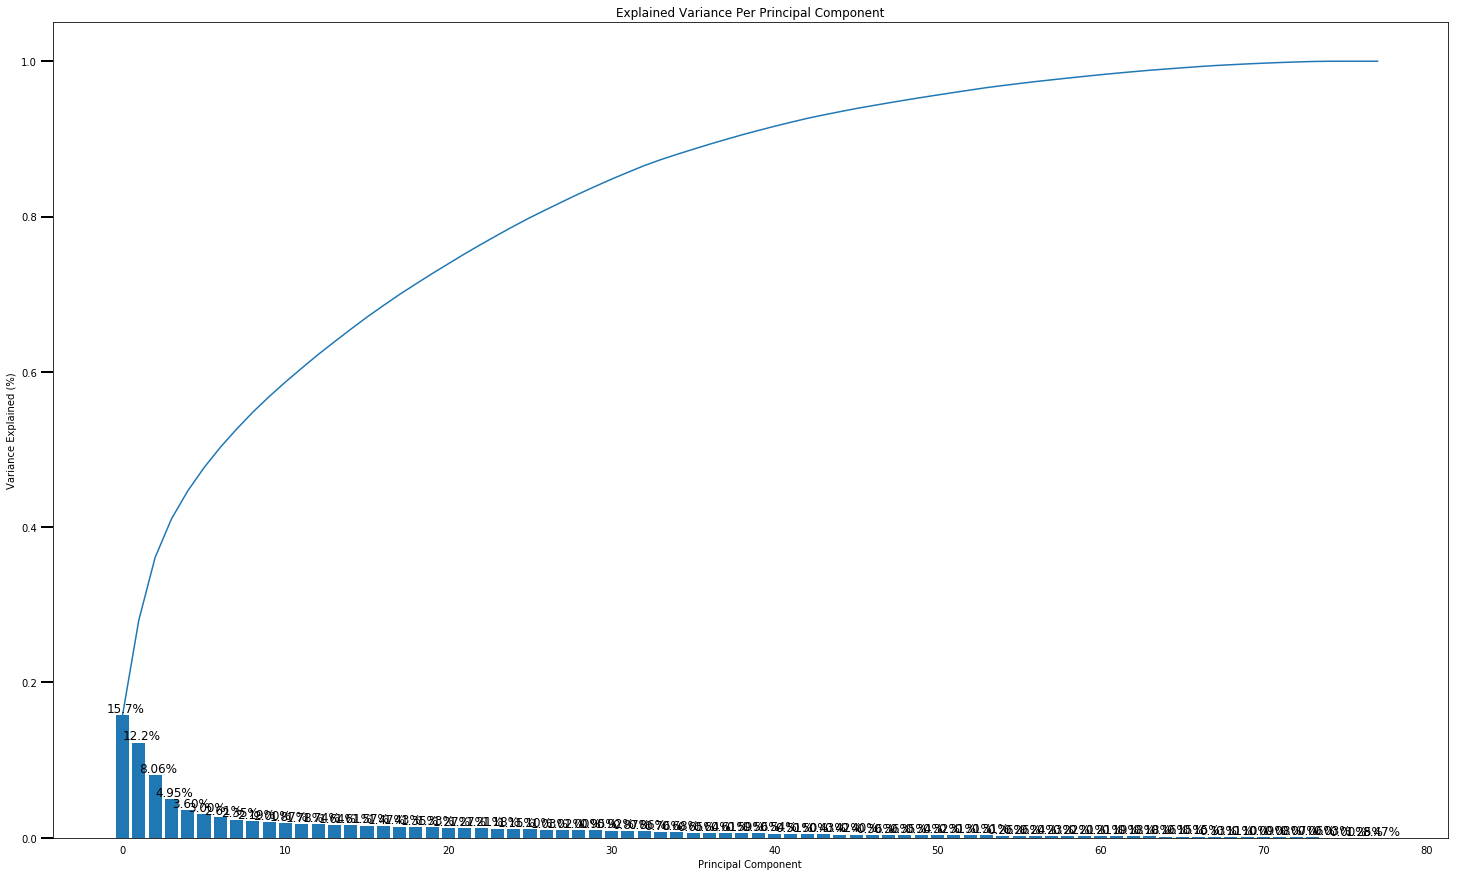

In [10]:
# Investigate the variance accounted for by each principal component.
scree_plot(pca)

In [9]:
# Re-apply PCA to the data while selecting for number of components to retain.

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(25, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

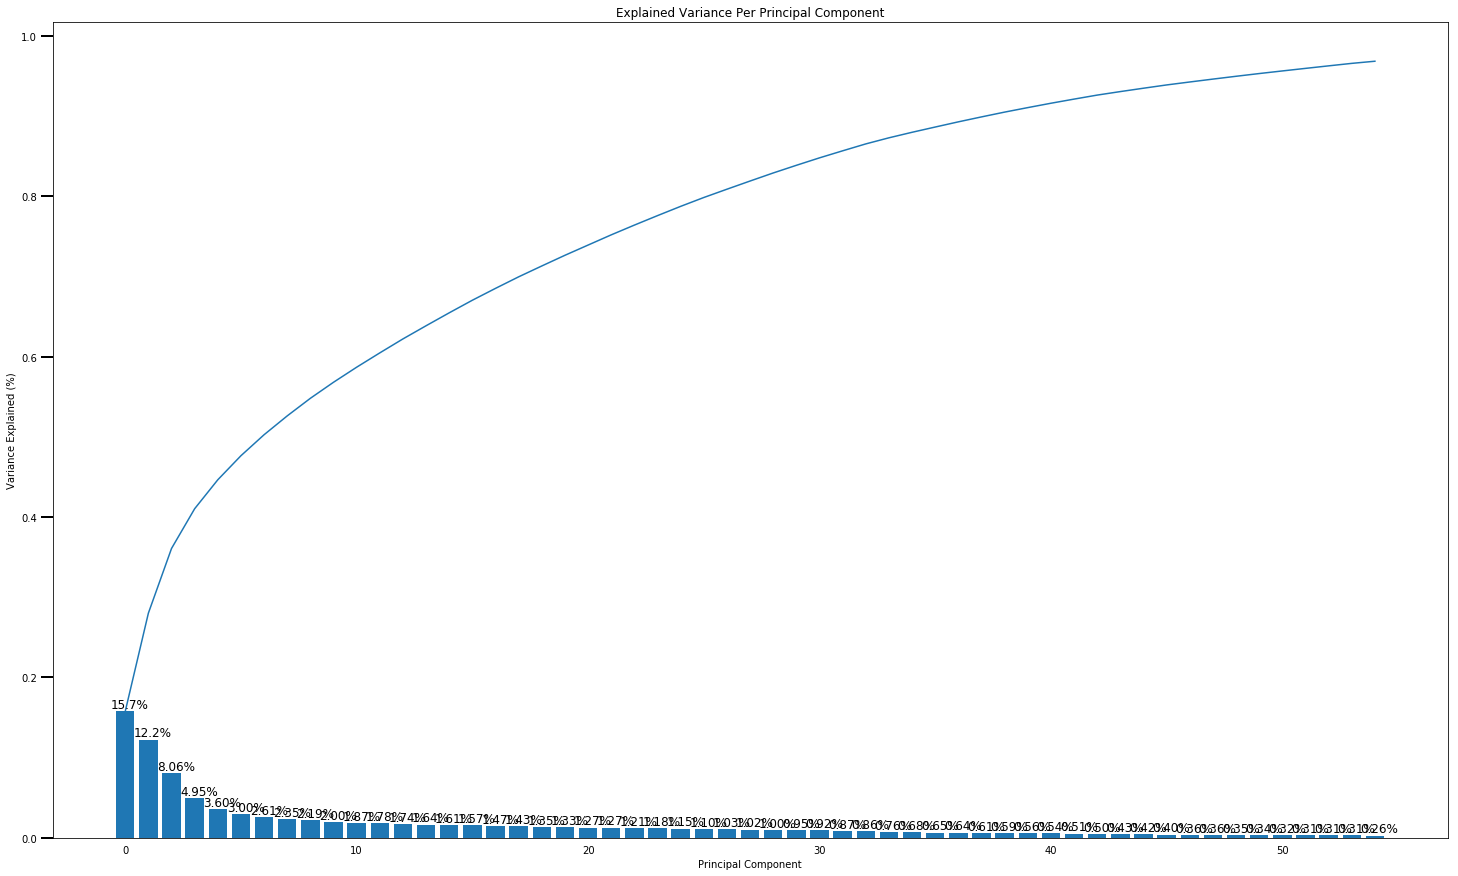

In [11]:
pca1,x_pca1=do_pca(55,scaler_data)
scree_plot(pca1)

In [12]:
#chk_pca=PCA(55)
#df_pca=pca.fit_transform(scaler_data)
add1=0
for i in range(45):
    add1=add1+pca1.explained_variance_ratio_[i]
print(add1)
#pca1.shape[0]
#pca1.explained_variance_ratio_[0]
x_pca1.shape


0.934977812583


(794298, 55)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

First purpose to apply PCA is dimension reduction of data. Origanl dataset consist of size 794298 rows × 78.columns. I kept 55 columns. As ater applying PCA they will represent 93.42% of data. So further analysis I will go with result of PCA. The new size is 794298 rows × 55.columns.



### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [13]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
scaler_data_components=pd.DataFrame(pca1.components_,columns=scaler_data.keys())

In [14]:

def print_weight(scaler_data_components,n,top):
    sorted_scaler=scaler_data_components.loc[n-1].sort_values(ascending=False)
    
    First_data=sorted_scaler[0:top][::1]
    last_data=sorted_scaler[-top:][::-1]
    #print(last_data)
    #print(First_data)
    plt.figure(figsize=(10,8))
    plt.bar([*range(len(First_data.keys()))],First_data.values)
    print(First_data.keys())
    plt.figure(figsize=(10,8))
    plt.bar([*range(len(last_data.keys()))],last_data.values)
    p=np.array(First_data.keys())
    q=np.array(last_data.keys())
    print(First_data)
    print("columns_name")
    for i in p:
        print(azdias_main.columns[i])
    print(last_data)
    print("columns_name")
    for i in q:
        print(azdias_main.columns[i])
    return 



Int64Index([52, 53, 54, 77, 30], dtype='int64')
52    0.218739
53    0.212688
54    0.207767
77    0.200119
30    0.195267
Name: 0, dtype: float64
columns_name
PLZ8_ANTG3
PLZ8_ANTG4
PLZ8_BAUMAX
CAMEO_INTL_2015_moderate
HH_EINKOMMEN_SCORE
47   -0.230809
50   -0.218440
38   -0.214663
42   -0.206403
2    -0.200047
Name: 0, dtype: float64
columns_name
MOBI_REGIO
PLZ8_ANTG1
KBA05_ANTG1
KBA05_GBZ
FINANZ_MINIMALIST


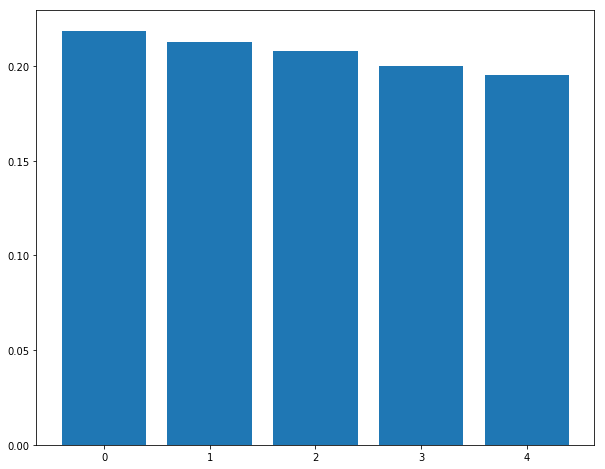

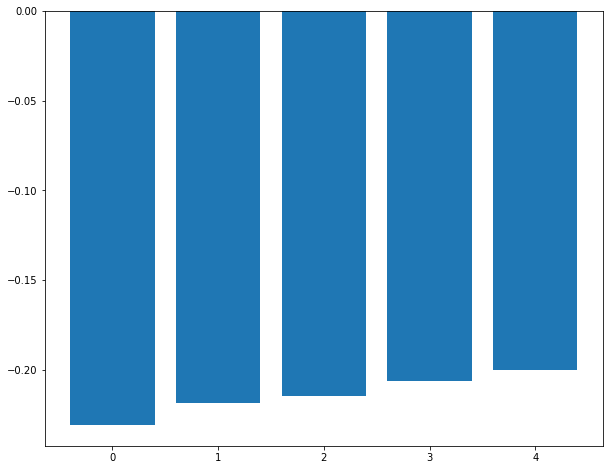

In [15]:
print_weight(scaler_data_components,1,5)

Int64Index([0, 4, 70, 18, 17], dtype='int64')
0     0.258709
4     0.233787
70    0.221093
18    0.220480
17    0.179609
Name: 1, dtype: float64
columns_name
ALTERSKATEGORIE_GROB
FINANZ_VORSORGER
ZABEOTYP_3
SEMIO_ERL
SEMIO_LUST
74   -0.250926
14   -0.249524
3    -0.240109
25   -0.233247
24   -0.228063
Name: 1, dtype: float64
columns_name
PRAEGENDE_JUGENDJAHRE_decade
SEMIO_REL
FINANZ_SPARER
SEMIO_TRADV
SEMIO_PFLICHT


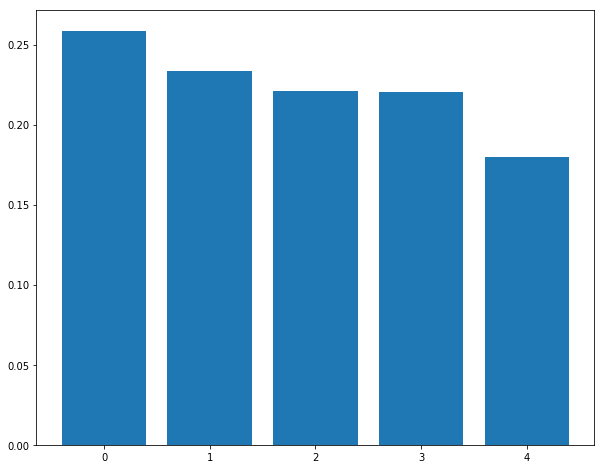

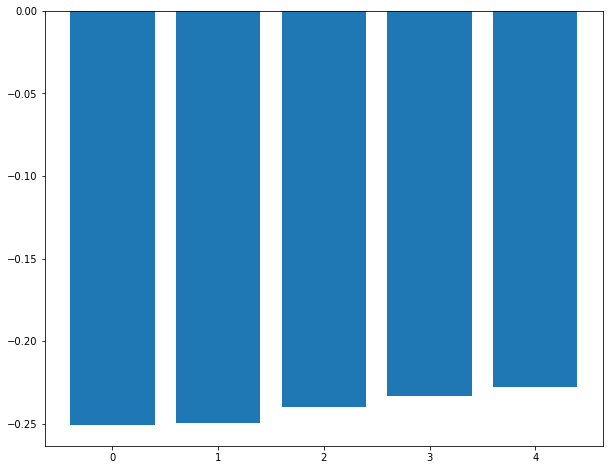

In [16]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_weight(scaler_data_components,2,5)

Int64Index([16, 12, 13, 19, 2], dtype='int64')
16    0.341337
12    0.262160
13    0.252321
19    0.239734
2     0.153660
Name: 2, dtype: float64
columns_name
SEMIO_VERT
SEMIO_SOZ
SEMIO_FAM
SEMIO_KULT
FINANZ_MINIMALIST
1    -0.364428
23   -0.332244
22   -0.307596
21   -0.277814
20   -0.203634
Name: 2, dtype: float64
columns_name
ANREDE_KZ
SEMIO_KAEM
SEMIO_DOM
SEMIO_KRIT
SEMIO_RAT


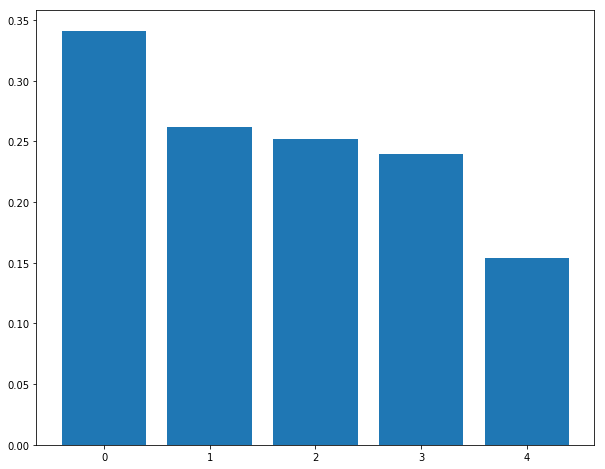

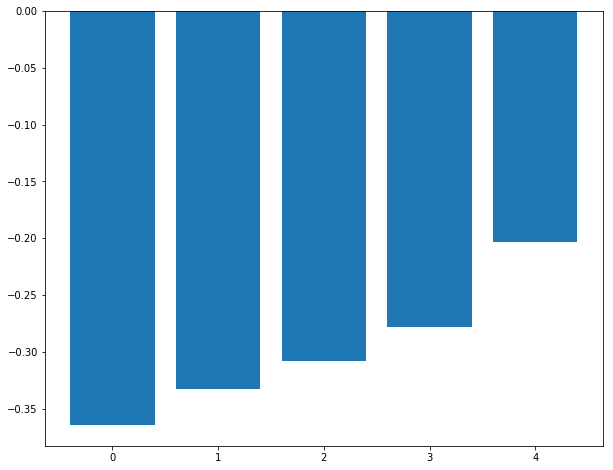

In [17]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_weight(scaler_data_components,3,5)

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)



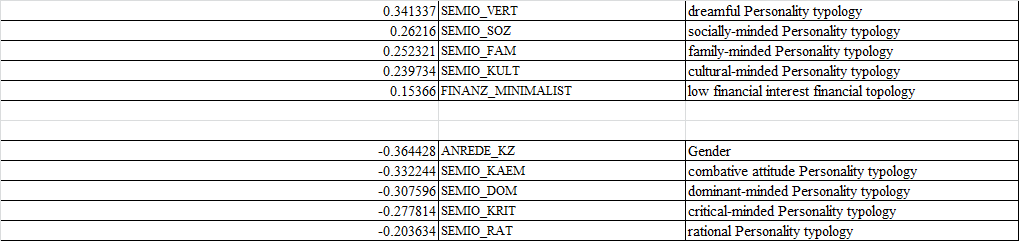

First Component: Mostly it is related to family house and financially condition

    Top 5 Postitive:
0.218739	PLZ8_ANTG3	Number of 6-10 family houses

0.212688	PLZ8_ANTG4	Number of 10+ family houses

0.207767	PLZ8_BAUMAX	Most common building type

0.200119	CAMEO_INTL_2015_moderate	moderate income

0.195267	HH_EINKOMMEN_SCORE	"Estimated household net income

Top 5 Negative:

-0.230809	MOBI_REGIO	Movement patterns


-0.21844	PLZ8_ANTG1	Number of 1-2 family houses

-0.214663	KBA05_ANTG1	Number of 3-5 family houses

-0.206403	KBA05_GBZ	Number of buildings in the microcell

-0.200047	FINANZ_MINIMALIST	low financial interest

First three  positive weights related to highly share of family houses. Theay have moderate wealth typologies with very low income. Top negative weights suggest that very high movement patterns, less number of family house, very few number of 1-2 family house in cell, Highly money saver.


Second Component: Mostly it is related toAGE, Finance,Personality.


    Top 5 Postitive:
0.258709	ALTERSKATEGORIE_GROB	Estimated age based on given name analysis

0.233787	FINANZ_VORSORGER	be prepared Financial typology

0.221093	ZABEOTYP_3	Energy consumption

0.22048	SEMIO_ERL	event-oriented Personality typology

0.179609	SEMIO_LUST	sensual-minded Personality typology
	
Top 5 Negative:    
-0.250926	PRAEGENDE_JUGENDJAHRE_decade	decade wise Dominating movement of person's youth 

-0.249524	SEMIO_REL	religious Financial typology

-0.240109	FINANZ_SPARER	money-saver Financial typology

-0.233247	SEMIO_TRADV	tradional-minded Personality typology

-0.228063	SEMIO_PFLICHT	dutiful Personality typology


Top positive implies that it is of older people, financially prepared , less aware of energy consumption. They are sensual minded. While on the other hand negative value finds early dominating movemet ,money saver, traditional minded, very much dutiful.

Clearly these principal component represet old peoples.


Third Component: Mostly it is related to Personality.

Top 5 Postitive: 
0.341337	SEMIO_VERT	dreamful Personality typology

0.26216	SEMIO_SOZ	socially-minded Personality typology

0.252321	SEMIO_FAM	family-minded Personality typology

0.239734	SEMIO_KULT	cultural-minded Personality typology

0.15366	FINANZ_MINIMALIST	low financial interest financial topology 
		
Top 5 Negative:		
-0.364428	ANREDE_KZ	Gender

-0.332244	SEMIO_KAEM	combative attitude Personality typology

-0.307596	SEMIO_DOM	dominant-minded Personality typology

-0.277814	SEMIO_KRIT	critical-minded Personality typology

-0.203634	SEMIO_RAT	rational Personality typology


Top positive weights tell that, it is of highly dreamful, social , family minded , social  personality. Also it gives low financial interest.  Whereas negative components tells that , mostly female, lowest combative attitude, less dominant, less critivcal and rational personality  



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [18]:
from sklearn.cluster import KMeans
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score    
  

In [26]:
get_kmeans_score(x_pca1,5)

102986749.28160629

In [20]:
X_PCA1 = x_pca1[np.random.choice(x_pca1.shape[0], int(x_pca1.shape[0]*0.2), replace=False)]
score=[]
for i in range(1,21):
    print(i)
    score.append(get_kmeans_score(X_PCA1,i))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[11862142.634958148, 10409971.026340067, 9684544.8385539688, 9228013.0841924343, 8928243.889950823, 8674520.4430898689, 8435072.2650889028, 8253386.12974496, 8111950.1677812617, 7991432.5520563042, 7888542.1847966351, 7794472.6048527742, 7668273.028802841, 7603669.7257749811, 7509437.9772652294, 7456478.2899883911, 7360279.7987801991, 7312110.8453386733, 7250366.7073079171, 7199625.5115915053]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


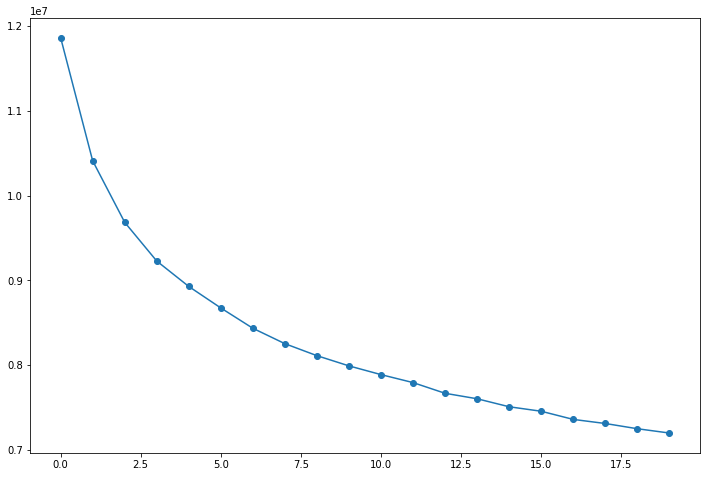

In [21]:
print(score)
plt.figure(figsize=(12,8))
plt.plot([*range(len(score))],score,marker='o',linestyle='-')
print([*range(len(score))])

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


In [19]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

cluster=10



kmeans = KMeans(cluster)

    # Then fit the model to your data using the fit method
model = kmeans.fit(x_pca1)



In [18]:
data_predict=kmeans.fit_predict(x_pca1)

In [20]:

data_predict1=model.predict(x_pca1)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

After looking from graph, I find that n=10 clusters are good to segment the population as graph doesnt come with proper elbow structure

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [21]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",delimiter=';')
customer_data=clean_data(customers)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customer_Impute=(impute.transform(customer_data))
customer_Impute1=pd.DataFrame(customer_Impute)
customer_scaler=scaler.transform(customer_Impute1)
customer_scaler1=pd.DataFrame(customer_scaler)
customer_pca=pca1.transform(customer_scaler1)
print('check')
K_customer=kmeans.predict(customer_pca)

check


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [23]:
general_predict = pd.DataFrame(np.array(data_predict1), columns=['Predict'])
customer_predict = pd.DataFrame(np.array(K_customer), columns=['Predict'])

In [24]:
azdias_prop = general_predict.groupby('Predict').size()
customer_prop = customer_predict.groupby('Predict').size()


In [25]:
print(azdias_prop)

Predict
0    126352
1     99598
2     69623
3     61869
4    106219
5     87758
6     86885
7     83744
8     68912
9      3338
dtype: int64


In [26]:
print(customer_prop)

Predict
0    68036
1    13932
2     1336
3    17813
4    17333
5     2162
6     1558
7    11978
8     4180
9     2831
dtype: int64


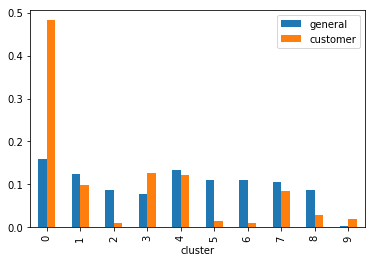

In [27]:
general_proportion=[]
customer_proportion=[]
idx=[i for i in range(10)]
for i in range(10):
    general_proportion.append((data_predict1==i).sum()/len(data_predict1))
    customer_proportion.append((K_customer==i).sum()/len(K_customer))
plt.figure(figsize=(15,12))
gen_dataframe=pd.DataFrame({'cluster':idx,'general':general_proportion,'customer':customer_proportion})
gen_dataframe.plot(x='cluster',y=['general','customer'],kind='bar')

In [28]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
clust_pca=x_pca1[data_predict1==0]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame(np.round(cust_feat),columns=pm.columns)
cust_feat.head(5)

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                   3.0        0.0                3.0            4.0   
1                   3.0        0.0                4.0            2.0   
2                   3.0        0.0                5.0            3.0   
3                   3.0       -0.0                3.0            3.0   
4                   4.0        0.0                5.0            1.0   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0               3.0             4.0                    2.0               2.0   
1               4.0             2.0                    4.0               1.0   
2               3.0             2.0                    2.0               1.0   
3               4.0             3.0                    3.0               2.0   
4               5.0             2.0                    1.0               3.0   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0               1.0         3.0            ...                    0.0   
1              -0.0         1.0            ...                    1.0   
2               1.0         3.0            ...                    0.0   
3              -0.0         3.0            ...                   -0.0   
4               0.0         2.0            ...                    1.0   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0         0.0        -0.0         0.0         0.0         1.0   
1        -0.0         0.0        -0.0        -0.0        -0.0   
2         0.0        -0.0         1.0         0.0        -0.0   
3        -0.0         0.0        -0.0        -0.0         1.0   
4         0.0        -0.0        -0.0         0.0         0.0   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                           6.0                               1.0   
1                           4.0                               0.0   
2                           5.0                               1.0   
3                           5.0                              -0.0   
4                           3.0                               0.0   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                      1.0                       1.0  
1                     -0.0                       4.0  
2                     -0.0                       4.0  
3                      1.0                       1.0  
4                      2.0                      -0.0  

[5 rows x 78 columns]

In [35]:
clust_pca=x_pca1[data_predict1==3]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame(np.round(cust_feat),columns=pm.columns)
cust_feat.head(5)

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                   3.0        1.0                1.0            4.0   
1                   3.0       -0.0                5.0            2.0   
2                   4.0        1.0                5.0            1.0   
3                   2.0        1.0                4.0            1.0   
4                   4.0        1.0                4.0            1.0   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0               2.0             3.0                    4.0               5.0   
1               3.0             1.0                    3.0               1.0   
2               5.0             2.0                    1.0               3.0   
3               5.0             1.0                    2.0               3.0   
4               5.0             1.0                    2.0               3.0   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0               1.0         3.0            ...                   -0.0   
1               1.0         3.0            ...                    0.0   
2               1.0         2.0            ...                    1.0   
3               1.0         2.0            ...                    1.0   
4               1.0         2.0            ...                    0.0   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0         0.0        -0.0        -0.0         1.0        -0.0   
1         1.0         0.0        -0.0         0.0        -0.0   
2         0.0        -0.0         0.0         0.0         0.0   
3         0.0         0.0        -0.0        -0.0         0.0   
4         0.0         1.0         0.0         0.0        -0.0   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                           6.0                               1.0   
1                           4.0                               1.0   
2                           3.0                               1.0   
3                           2.0                               1.0   
4                           2.0                               1.0   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                      2.0                      -0.0  
1                      0.0                       3.0  
2                      1.0                       0.0  
3                      2.0                      -0.0  
4                      2.0                      -0.0  

[5 rows x 78 columns]

In [34]:
clust_pca=x_pca1[data_predict1==9]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame((cust_feat),columns=pm.columns)
cust_feat.head(5)

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0              3.091483   1.146880           1.966490       2.870879   
1              2.659579   0.173123           1.310876       4.431220   
2              3.071937   0.432440           0.882934       4.882292   
3              3.054006   1.044498           3.948352       2.239478   
4              3.671696   0.946429           4.385913       0.739899   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0          3.812679        3.413327               2.125664          3.771601   
1          2.985401        4.632665               5.040890          4.399789   
2          2.541023        4.670538               4.279245          4.892207   
3          3.774220        2.839309               2.953878          1.026828   
4          4.873228        1.463933               2.379588          3.015064   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0          1.002218    1.055625            ...              -0.006102   
1          0.055955    2.125292            ...               1.000672   
2          0.058974    2.190607            ...               0.017004   
3          1.004772    2.001223            ...              -0.004598   
4          1.000595    1.997750            ...               1.000812   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0    0.000810    0.008491    0.982611    0.008579    0.005611   
1   -0.002668   -0.012059    0.012829   -0.012450    0.013676   
2    0.005404    0.939790    0.034847    0.006096   -0.003140   
3   -0.000959    0.020848    0.983120   -0.005098    0.006687   
4   -0.000304   -0.017509   -0.001078    0.012361    0.005719   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                      4.283074                          1.006453   
1                      4.550619                          0.155404   
2                      4.891447                          0.171004   
3                      4.755618                          0.987071   
4                      2.427410                          1.012618   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                 0.029941                  4.077135  
1                -0.101354                  3.695555  
2                -0.240256                  4.254921  
3                 1.791703                 -0.678560  
4                -0.064074                  2.722246  

[5 rows x 78 columns]

In [30]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
check=kmeans.cluster_centers_
pca_inverse=pca1.inverse_transform(check)
scaler1=scaler.inverse_transform(pca_inverse)
scaler1.shape
check_df=pd.DataFrame(scaler1,columns=customer_data.columns).round(2)
check_df.head()

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                  3.37       0.06               4.69           1.59   
1                  3.54       0.99               2.52           1.86   
2                  1.93      -0.02               1.93           4.36   
3                  3.31       0.92               4.15           1.84   
4                  3.33       0.03               3.35           1.96   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0              4.31            1.83                   1.90              2.07   
1              4.33            2.21                   1.70              4.34   
2              2.03            3.50                   3.76              3.57   
3              3.98            2.30                   2.33              2.19   
4              4.24            1.66                   1.71              3.53   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0              0.37        2.18            ...                   0.40   
1              0.06        1.99            ...                   0.00   
2              0.12        2.38            ...                   0.08   
3              0.93        2.16            ...                   0.19   
4              0.10        2.38            ...                   0.04   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0        0.03        0.32        0.18        0.00        0.05   
1        0.00        0.82        0.10        0.00        0.07   
2        0.00        0.04        0.43        0.37        0.08   
3        0.22        0.41        0.17        0.00        0.02   
4        0.00        0.56        0.13        0.00        0.27   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                          3.50                              0.37   
1                          3.30                              0.07   
2                          5.67                              0.13   
3                          3.86                              0.93   
4                          3.51                              0.11   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                     1.12                      1.17  
1                     0.12                      4.15  
2                     0.08                      4.30  
3                     1.10                      0.92  
4                     0.13                      4.13  

[5 rows x 78 columns]

In [31]:
clust_pca=x_pca1[data_predict1==2]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame((cust_feat),columns=pm.columns)
cust_feat.head(5)

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0              1.918945  -0.188271           3.521490       4.008394   
1              1.320299   0.000265           0.692099       5.159188   
2              1.886952  -0.025643           2.189167       4.450837   
3              1.900037  -0.128317           1.889113       4.055222   
4              1.979657  -0.104384           0.553948       5.415765   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0          1.262229        2.117180               5.094583          1.318677   
1          2.565101        4.875388               4.596889          4.969305   
2          2.439121        4.293560               3.466808          2.982994   
3          1.244979        0.974227               5.168000          3.851268   
4          2.008222        4.511817               4.559376          4.847725   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0         -0.002702    1.978522            ...              -0.001386   
1         -0.012522    2.014237            ...              -0.001646   
2          0.003438    2.998873            ...              -0.008444   
3          1.003485    2.983854            ...              -0.009523   
4         -0.030808    2.974019            ...               0.009205   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0   -0.002264    0.018361    0.997142   -0.004370   -0.007482   
1    0.000873    0.023862    0.982703   -0.009060    0.003267   
2   -0.002523    0.020764    0.996591    0.002080   -0.008468   
3   -0.002179    0.013466   -0.001867    1.000387   -0.000283   
4    0.002098   -0.019717    1.016305   -0.003078   -0.004814   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                      5.522754                         -0.001184   
1                      5.769438                          0.008879   
2                      5.394544                          0.005660   
3                      5.953846                          0.998668   
4                      6.230355                         -0.002960   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                -0.091038                  4.737820  
1                -0.094396                  4.758657  
2                 0.157805                  4.451166  
3                 0.069821                  4.205193  
4                -0.091678                  4.772955  

[5 rows x 78 columns]

In [32]:
clust_pca=x_pca1[data_predict1==5]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame((cust_feat),columns=pm.columns)
cust_feat.head(5)

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0              0.992363   0.803605           3.081471       1.258759   
1              1.923881   1.075348           1.410685       4.795178   
2              3.349003   1.048172           1.658841       3.789207   
3              1.140004   1.076021           1.719701       4.376942   
4              1.129022   0.820010           3.544778       3.773307   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0          5.261615        1.650080               1.881828          5.154092   
1          1.559721        5.056359               4.234171          3.103557   
2          2.005832        3.306078               5.068327          3.577514   
3          2.894549        4.852005               4.867065          2.500341   
4          1.205958        3.224367               4.600435          0.909578   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0         -0.007406    2.961701            ...              -0.007067   
1         -0.021880    2.023204            ...              -0.006993   
2          0.991771    2.087863            ...              -0.009293   
3          1.007204    3.025388            ...               0.006447   
4          0.009583    2.989756            ...              -0.005772   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0   -0.002966    0.040900    0.992329   -0.014517   -0.008679   
1   -0.004430    0.015690    1.010747   -0.001036   -0.013979   
2    0.000242    0.013780    0.987330    0.010116   -0.002175   
3   -0.001546   -0.018887    0.016095    0.995998    0.001892   
4   -0.001358    0.036290   -0.013031    0.986517   -0.002646   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                      2.624512                          0.003801   
1                      5.818894                          0.002888   
2                      5.570845                          1.001889   
3                      6.283296                          1.011115   
4                      6.331220                         -0.010865   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                -0.200847                  4.401469  
1                 2.002235                 -0.024802  
2                 1.291888                  0.907263  
3                 0.127751                  3.361988  
4                -0.024376                  3.949636  

[5 rows x 78 columns]

In [33]:
#df111=customer_predict[customer_predict==4].index
#df111_chk=customer_data.iloc[df111]
#df111_chk.head(3)
clust_pca=x_pca1[data_predict1==6]
chk_feat=pca1.inverse_transform(clust_pca)
cust_feat=scaler.inverse_transform(chk_feat)
cust_feat=pd.DataFrame(np.round(cust_feat),columns=pm.columns)
cust_feat.head(5)


ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                   1.0        1.0                1.0            5.0   
1                   2.0        1.0                1.0            4.0   
2                   2.0        1.0                3.0            2.0   
3                   1.0        1.0                2.0            4.0   
4                   1.0        1.0                1.0            5.0   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0               2.0             5.0                    4.0               5.0   
1               2.0             3.0                    5.0               4.0   
2               4.0             1.0                    3.0               4.0   
3               2.0             3.0                    4.0               3.0   
4               3.0             5.0                    3.0               5.0   

   GREEN_AVANTGARDE  HEALTH_TYP            ...             ZABEOTYP_1  \
0               0.0         3.0            ...                    0.0   
1              -0.0         1.0            ...                    0.0   
2               0.0         2.0            ...                    0.0   
3               0.0         3.0            ...                   -0.0   
4               0.0         3.0            ...                   -0.0   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0         0.0        -0.0         0.0         1.0        -0.0   
1         0.0        -0.0         1.0         0.0        -0.0   
2         0.0         1.0        -0.0        -0.0         0.0   
3        -0.0         0.0         1.0         0.0         0.0   
4        -0.0         0.0         0.0         1.0        -0.0   

   PRAEGENDE_JUGENDJAHRE_decade  PRAEGENDE_JUGENDJAHRE_main_avant  \
0                           6.0                               0.0   
1                           5.0                              -0.0   
2                           4.0                              -0.0   
3                           6.0                              -0.0   
4                           6.0                              -0.0   

   CAMEO_INTL_2015_wealthy  CAMEO_INTL_2015_moderate  
0                     -0.0                       5.0  
1                     -0.0                       5.0  
2                     -0.0                       4.0  
3                      0.0                       4.0  
4                      0.0                       4.0  

[5 rows x 78 columns]

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)


By looking at bar plt is seems that cluster 0,3,9   are overrepresented and 2,5,6 clusters are underrepresented. 4 Cluster  have almost same percentage of peoples.

 Over represented data:

ALTERSKATEGORIE_GROB belongs to Estimated age based on given name analysis. And it is found that these group belong to persons of 45- 60 yeares old. It may be male or female. High value of ‘FINANZ_MINIMALIST’ suggest that low financial interest topology. They are moderate investor, having low prepared and high home ownership financial topologies. It consist of mostly either sanitary affine or jaunty hedonists health topology. They also come with mixing of  wealth/life  stage topology.
 
 Under Represented Data
 
   These group belong to middle age group of 30 to 45 having man.Financial they moderately save money, low financial prepared and low financial interest.  Mostly they are investor, financially low inconspicuous and not a member of environmental sustainability as part of youth . Dominating movement of person's youth in the decade of 80 & 90 with blow mixed life/ stage topologies.

 


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.